# 🚀 2025 Intelligent Fraud Detection in Banking Transactions 🏦  

## 📌 Problem  
- Increasing **online & digital banking** → more **fraudulent activities** (⚠️ identity theft, unauthorized access, suspicious patterns).  
- Traditional methods = **reactive & outdated**, struggle with evolving fraud tactics.  

---

## 📊 Data Available  
- 👤 **Customer Info**: ID, name, gender, age, location, account type.  
- 💳 **Transaction Info**: ID, date, time, amount, type, balance, currency.  
- 🛍️ **Merchant Info**: ID, category, location.  
- 💻 **Device/Network Info**: device type, location, transaction device.  
- 🚩 **Fraud Label**: `Is_Fraud` (0 = genuine, 1 = fraud).  

---

## 🎯 Objectives  
- 🔎 Detect **fraudulent transactions in real time**.  
- ⚡ Minimize **false positives** (don’t block genuine transactions).  
- 🧠 Adapt to **new fraud strategies** through ML.  
- 🤝 Enhance **customer trust & security**.  

---


## 🚀 Expected Outcomes  
- 💰 Reduce **financial losses**.  
- 📢 Provide **real-time alerts** for fast action.  
- 🔐 Strengthen **security & compliance**.  
- 🙌 Increase **customer confidence**.  

---

## ⚡ Challenges  
- ⚖️ **Imbalanced dataset** (fraud = small % of all transactions).  
- 🔏 **Privacy & security concerns** with sensitive data.  
- 🖥️ **Real-time processing power** needed for smooth user experience.  


In [1]:
# IMPORT NECESSARY LIBRARIES
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as ticker
from scipy import stats

In [2]:
# ======================================
# PANDAS & SEABORN CONFIGURATION
# ======================================

# ----- PANDAS DISPLAY SETTINGS -----
# Display all columns and rows without truncation
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100)  # Limit rows to avoid excessive output
pd.set_option('display.width', 1000)    # Adjust display width for better readability
pd.set_option('display.colheader_justify', 'center')  # Center-align headers

# Floating-point precision (2 decimal places)
pd.options.display.float_format = '{:,.2f}'.format  # Adds thousand separators

# Improve performance with larger datasets
pd.set_option('compute.use_numexpr', True)  # Faster numerical operations
pd.set_option('mode.chained_assignment', 'warn')  # Warn on chained assignments

# ----- SEABORN & MATPLOTLIB STYLING -----
# Set a modern and clean style
sns.set_theme(
    style="whitegrid",  # Background grid for better readability
    context="notebook",  # Optimize for notebook display
    palette="deep",      # Aesthetic color palette
    font="sans-serif",   # Clean font
    font_scale=1.1,      # Slightly larger font size
    rc={
        'figure.figsize': (10, 6),  # Default figure size
        'axes.titlesize': 16,       # Title font size
        'axes.labelsize': 14,        # Axis label size
        'xtick.labelsize': 12,      # X-tick label size
        'ytick.labelsize': 12,       # Y-tick label size
        'grid.alpha': 0.3,          # Grid transparency
    }
)

# Improve matplotlib defaults
plt.rcParams['figure.dpi'] = 100      # Higher resolution for figures
plt.rcParams['savefig.dpi'] = 300     # High DPI for saved figures
plt.rcParams['lines.linewidth'] = 2   # Thicker plot lines
plt.rcParams['axes.edgecolor'] = '0.15'  # Softer axis edge color

# Disable scientific notation for small numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)   # Suppress scientific notation in NumPy

# Suppress unnecessary warnings (optional)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)  # Ignore PerformanceWarnings

In [3]:
# Load the dataset with error handling
try:
    
    # Replace this with the correct path to your dataset file
    df = pd.read_csv(r'G:\Study\DATA SCINCE\PROJECTS\POTFOLIO\Financial Fraud Modeling for LOL Bank\Data\Bank_Transaction_Fraud_Detection.csv')
    print("✅ Dataset loaded successfully!")
    print(f"Shape: {df.shape} (Rows: {df.shape[0]}, Columns: {df.shape[1]})")
    
    # Display first 3 rows 
    display(df.head(3))
    
    # Basic info
    print("\n📊 Data Overview:")
    display(df.info(verbose=True, show_counts=True))  # Shows non-null counts & dtypes
    
    # Check for duplicates
    print(f"\n🔍 Duplicates: {df.duplicated().sum()}")

    # Missing values summary
    print("\n❓ Missing Values:")
    missing = df.isna().sum().to_frame(name="Missing Values")
    missing["% Missing"] = (missing["Missing Values"] / len(df)) * 100
    display(missing.sort_values("% Missing", ascending=False))

except FileNotFoundError:
    print("❌ Error: File not found. Check the file path!")
except Exception as e:
    print(f"❌ Unexpected error: {e}")

✅ Dataset loaded successfully!
Shape: (200000, 24) (Rows: 200000, Columns: 24)


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,03:09:52,63062.56,97977d83-5486-4510-af1c-8dada3e1cfa0,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com



📊 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null 

None


🔍 Duplicates: 0

❓ Missing Values:


,Missing Values,% Missing
Customer_ID,0,0.00
Customer_Name,0,0.00
Gender,0,0.00
Age,0,0.00
State,0,0.00
City,0,0.00
Bank_Branch,0,0.00
Account_Type,0,0.00
Transaction_ID,0,0.00
Transaction_Date,0,0.00


### 🕒 Date & Time Formatting
- The `Transaction_Date` and `Transaction_Time` columns need to be **converted to proper datetime format** for accurate analysis.


## DATA CLEANING & PRE-PROCESSING
 

In [4]:
# Handling Transaction_Date


df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Day'] = df['Transaction_Date'].dt.day
df['Month'] = df['Transaction_Date'].dt.month
df['Weekday'] = df['Transaction_Date'].dt.weekday
df['Is_Weekend'] = df['Transaction_Date'].dt.weekday >= 5



C:\Users\admin\AppData\Local\Temp\ipykernel_7228\3165955179.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])


In [10]:
# Import the pandas library
import pandas as pd

# Define the file path
file_path = 'G:\Study\DATA SCINCE\PROJECTS\POTFOLIO\Financial Fraud Modeling for LOL Bank\Data\power_bi_fraud_data_organized.xlsx' # <-- CHANGE THIS!

# Create an Excel file with multiple sheets using a context manager
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    
    # 1. Main Transactions Fact Table (contains all transactional records and keys)
    # This is your main event log. Keep the keys (ID columns) to link to other tables.
    df.to_excel(writer, sheet_name='Fact_Transactions', index=False)
    
    # 2. Customer Dimension Table (contains one row per unique customer)
    # Select customer attributes and remove duplicates
    customer_columns = ['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Customer_Contact', 'Customer_Email']
    customer_df = df[customer_columns].drop_duplicates(subset=['Customer_ID'])
    customer_df.to_excel(writer, sheet_name='Dim_Customers', index=False)
    
    # 3. Merchant Dimension Table (contains one row per unique merchant)
    merchant_columns = ['Merchant_ID', 'Merchant_Category']
    merchant_df = df[merchant_columns].drop_duplicates(subset=['Merchant_ID'])
    merchant_df.to_excel(writer, sheet_name='Dim_Merchants', index=False)
    
    # 4. (Optional) Time Dimension Table
    # Create a simple time table from the unique dates in your transactions
    time_columns = ['Transaction_Date', 'Day', 'Month', 'Weekday', 'Is_Weekend', 'Hour', 'Time_Bucket']
    time_df = df[time_columns].drop_duplicates(subset=['Transaction_Date'])
    time_df.to_excel(writer, sheet_name='Dim_Date', index=False)

print(f"Organized Excel workbook successfully saved to: {file_path}")
print("Sheets created: Fact_Transactions, Dim_Customers, Dim_Merchants, Dim_Date")

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\admin\AppData\Local\Temp\ipykernel_7228\3921283714.py:5: SyntaxWarning: invalid escape sequence '\S'
  file_path = 'G:\Study\DATA SCINCE\PROJECTS\POTFOLIO\Financial Fraud Modeling for LOL Bank\Data\power_bi_fraud_data_organized.xlsx' # <-- CHANGE THIS!


Organized Excel workbook successfully saved to: G:\Study\DATA SCINCE\PROJECTS\POTFOLIO\Financial Fraud Modeling for LOL Bank\Data\power_bi_fraud_data_organized.xlsx
Sheets created: Fact_Transactions, Dim_Customers, Dim_Merchants, Dim_Date


In [7]:
# Handling Transaction_time

df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S')
df['Hour'] = df['Transaction_Time'].dt.hour
df['Minutes'] = df['Transaction_Time'].dt.minute
df['Seconds'] = df['Transaction_Time'].dt.second

def time_bucket(h):
    if 5 <= h <= 11: return 'Morning'
    elif 12 <= h <= 17: return 'Afternoon'
    elif 18 <= h <= 22: return 'Evening'
    else: return 'Night'

df['Time_Bucket'] = df['Hour'].apply(time_bucket)

## 📊 Exploratory Data Analysis (EDA)

The goal of EDA is to understand the dataset, uncover patterns, spot anomalies, and generate hypotheses for further analysis.

In [6]:
def dataset_summary(df):
    """
    Display enhanced summary statistics for numerical and categorical columns
    in a dataset.
    
    Parameters:
    df : pandas.DataFrame
        The dataset to analyze.
    """
    # Numerical columns summary
    print("📈 Numerical Columns Summary:")
    display(df.describe())
    
    # Categorical columns summary
    print("\n📌 Categorical Columns Summary:")
    display(df.describe(include=['object', 'category']))
dataset_summary(df)    


📈 Numerical Columns Summary:


,Age,Transaction_Date,Transaction_Time,Transaction_Amount,Account_Balance,Is_Fraud,Day,Month,Weekday,Hour,Minutes,Seconds
count,200000.00,200000,200000,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00,200000.00
mean,44.02,2025-01-15 12:23:01.104000256,1900-01-01 11:59:23.928309760,49538.02,52437.99,0.05,15.52,1.00,2.97,11.49,29.48,29.50
min,18.00,2025-01-01 00:00:00,1900-01-01 00:00:00,10.29,5000.82,0.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,31.00,2025-01-08 00:00:00,1900-01-01 06:00:01,24851.34,28742.40,0.00,8.00,1.00,1.00,6.00,15.00,14.00
50%,44.00,2025-01-16 00:00:00,1900-01-01 11:59:06.500000,49502.44,52372.56,0.00,16.00,1.00,3.00,11.00,29.00,29.00
75%,57.00,2025-01-23 00:00:00,1900-01-01 17:58:19,74314.62,76147.67,0.00,23.00,1.00,5.00,17.00,44.00,45.00
max,70.00,2025-01-31 00:00:00,1900-01-01 23:59:59,98999.98,99999.95,1.00,31.00,1.00,6.00,23.00,59.00,59.00
std,15.29,NaN,NaN,28551.87,27399.51,0.22,8.67,0.00,1.94,6.92,17.29,17.34



📌 Categorical Columns Summary:


,Customer_ID,Customer_Name,Gender,State,City,Bank_Branch,Account_Type,Transaction_ID,Merchant_ID,Transaction_Type,Merchant_Category,Transaction_Device,Transaction_Location,Device_Type,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email,Time_Bucket
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,200000,142699,2,34,145,145,3,200000,200000,5,6,20,148,4,1,9000,172,4779,4
top,9ba54b93-7009-4454-84b7-8ddb8593af0d,Aahana Kala,Male,Nagaland,Chandigarh,Chandigarh Branch,Checking,bba77e3c-19ce-4924-8661-813f0010ce24,7bd06101-ef33-4e48-9ce2-dc823f10f173,Credit,Restaurant,Self-service Banking Machine,"Kavaratti, Lakshadweep",POS,INR,+9191471XXXXXX,Sports ticket,krishnaXXX@XXXXX.com,Morning
freq,1,8,100452,6031,8135,8135,66924,1,1,40180,33525,21707,5954,50111,200000,41,1268,99,58489


# 📊 Part 1: The Macro View - Understanding the Landscape of Fraud  

## 🔎 1.1 Target Variable Analysis: The Scale of the Problem  

The first step in exploring fraud detection is to examine the **target variable** 🎯 `Is_Fraud`.  
This variable indicates whether a transaction is **fraudulent (`1`) 🚨** or **legitimate (`0`) ✅**.  

Understanding its distribution helps us see the **scale of the fraud problem 📉** and whether we are dealing with a **class imbalance ⚖️**.  


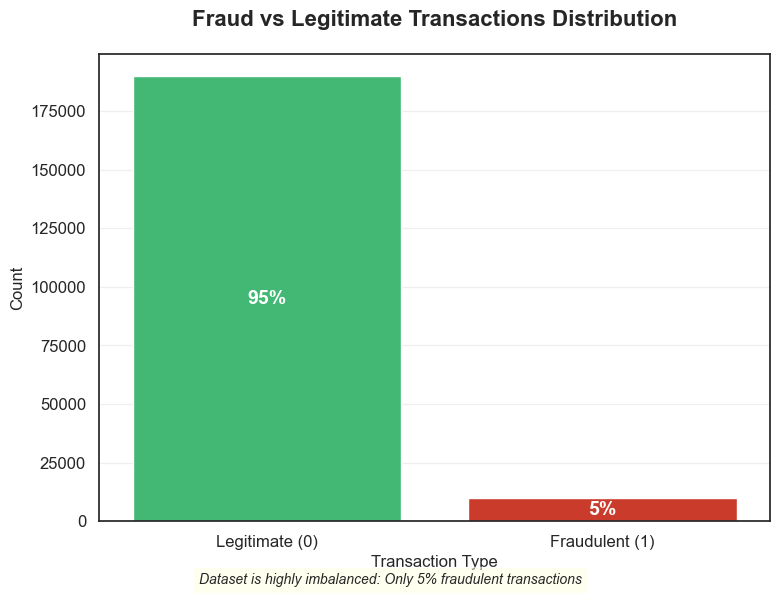

In [7]:
# Plotting the distribution of fraudulent vs legitimate transactions

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Is_Fraud', palette=['#2ecc71', "#e62611"])


# Add count values inside of bars
total = len(df)
for i, p in enumerate(ax.patches):
    percentage = f'{(p.get_height()/total)*100:.0f}%'
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/2,
            percentage, ha='center', va='center', fontsize=14, 
            fontweight='bold', color='white')
    

#Plot title and labels
plt.title('Fraud vs Legitimate Transactions Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.grid(axis='y', alpha=0.3)


# Add some context text
fraud_count = df['Is_Fraud'].sum()
fraud_percentage = (fraud_count / total) * 100
plt.figtext(0.5, 0.01, f'Dataset is highly imbalanced: Only {fraud_percentage:.0f}% fraudulent transactions', 
            ha='center', fontsize=10, style='italic', bbox={'facecolor': 'lightyellow', 'alpha': 0.5})

plt.tight_layout()
plt.show()

Legitimate Transactions: 189912 (94.96%)
Fraudulent Transactions: 10088 (5.04%)


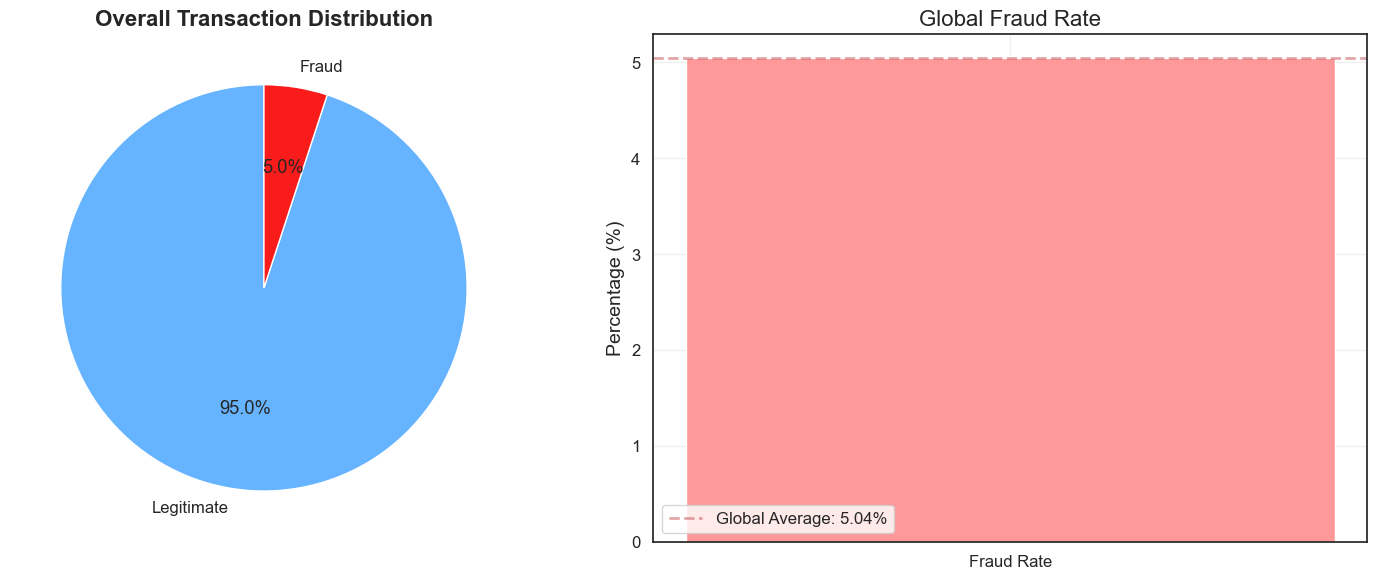

In [8]:
# Calculate fraud rate
fraud_rate = df['Is_Fraud'].mean() * 100
legit_count, fraud_count = df['Is_Fraud'].value_counts()
print(f"Legitimate Transactions: {legit_count} ({100-fraud_rate:.2f}%)")
print(f"Fraudulent Transactions: {fraud_count} ({fraud_rate:.2f}%)")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
colors = ['#66b3ff',"#fa1b1b"]

# Count plot
ax1.pie([legit_count, fraud_count], labels=['Legitimate', 'Fraud'], colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Overall Transaction Distribution', fontweight='bold')

# Fraud Rate bar
ax2.bar(['Fraud Rate'], [fraud_rate], color='#ff9999')
ax2.axhline(y=fraud_rate, color='r', linestyle='--', alpha=0.5, label=f'Global Average: {fraud_rate:.2f}%')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Global Fraud Rate')
ax2.legend()
plt.tight_layout()
plt.show()

## 📌 Insights  

The dataset exhibits a **classic high-class imbalance** 📉, with only **5% of transactions being fraudulent 🚨**.  

While this fraction may appear small, it represents a **significant financial risk 💸**.  

The primary business challenge is to build a model that can identify this **"needle in a haystack" 🪡** without overwhelming analysts with **false positives ❌✅**.  

👉 The cost of **missing a fraudulent transaction (false negative ⚠️)** is much higher than **incorrectly flagging a legitimate one (false positive 🤔)**.  



# Part 2: The "When" - Temporal Patterns of Fraud  

## 2.1 ⏰  

### 📌 Insights  
Fraudulent transactions are not uniformly distributed across the day.  
Instead, they exhibit **temporal spikes** that align with times when oversight is lower 🕵️‍♂️⬇️.  

- **Higher fraud rates** are often observed during **late-night to early-morning hours 🌙**.  
- Fraudsters exploit periods of **reduced monitoring and staff presence 💤**.  
- This temporal clustering provides a window for **real-time fraud detection systems ⏱️** to be more vigilant during “risky hours.”  

👉 Understanding the **"when"** allows businesses to **proactively allocate resources** and **tighten transaction monitoring** during high-risk windows.  
 


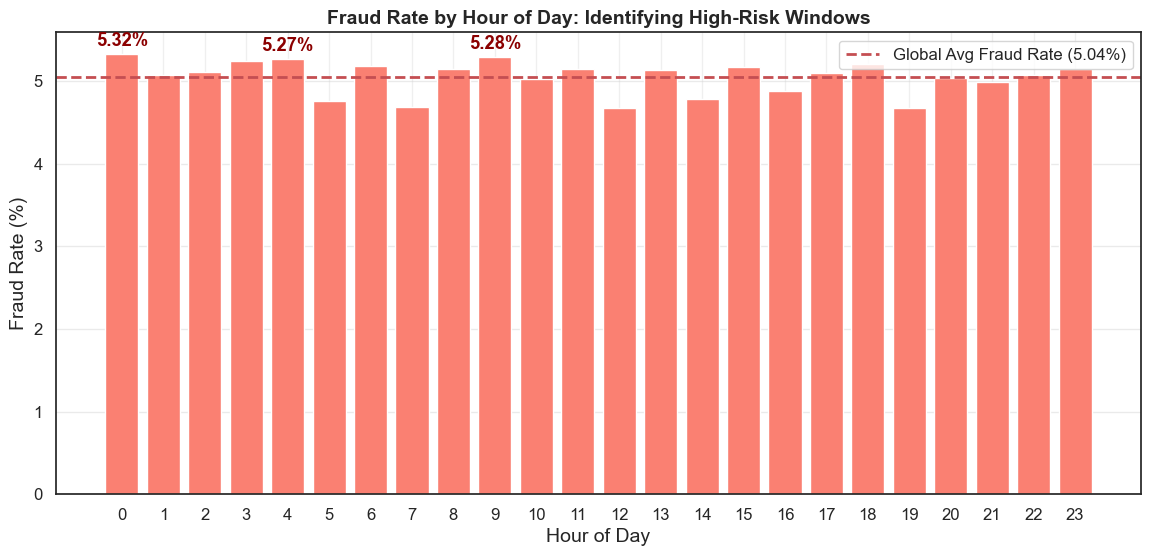

In [9]:
# Extract hour from datetime
df['Hour'] = df['Transaction_Time'].dt.hour
hourly_fraud_rate = df.groupby('Hour')['Is_Fraud'].mean() * 100

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(hourly_fraud_rate.index, hourly_fraud_rate.values, color='salmon')
plt.axhline(y=fraud_rate, color='r', linestyle='--', label=f'Global Avg Fraud Rate ({fraud_rate:.2f}%)')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (%)')
plt.title('Fraud Rate by Hour of Day: Identifying High-Risk Windows', fontweight='bold', fontsize=14)
plt.legend()

# Annotate the peak hours
peak_hours = hourly_fraud_rate.nlargest(3)
for hour, rate in peak_hours.items():
    plt.annotate(f'{rate:.2f}%', xy=(hour, rate), xytext=(hour, rate+0.05),
                 ha='center', va='bottom', fontweight='bold', color='darkred')

plt.grid(axis='y', alpha=0.4)
plt.xticks(range(0,24))
plt.show()


Engineering time-based features for analysis...


C:\Users\admin\AppData\Local\Temp\ipykernel_16652\246246972.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_DateTime'] = pd.to_datetime(


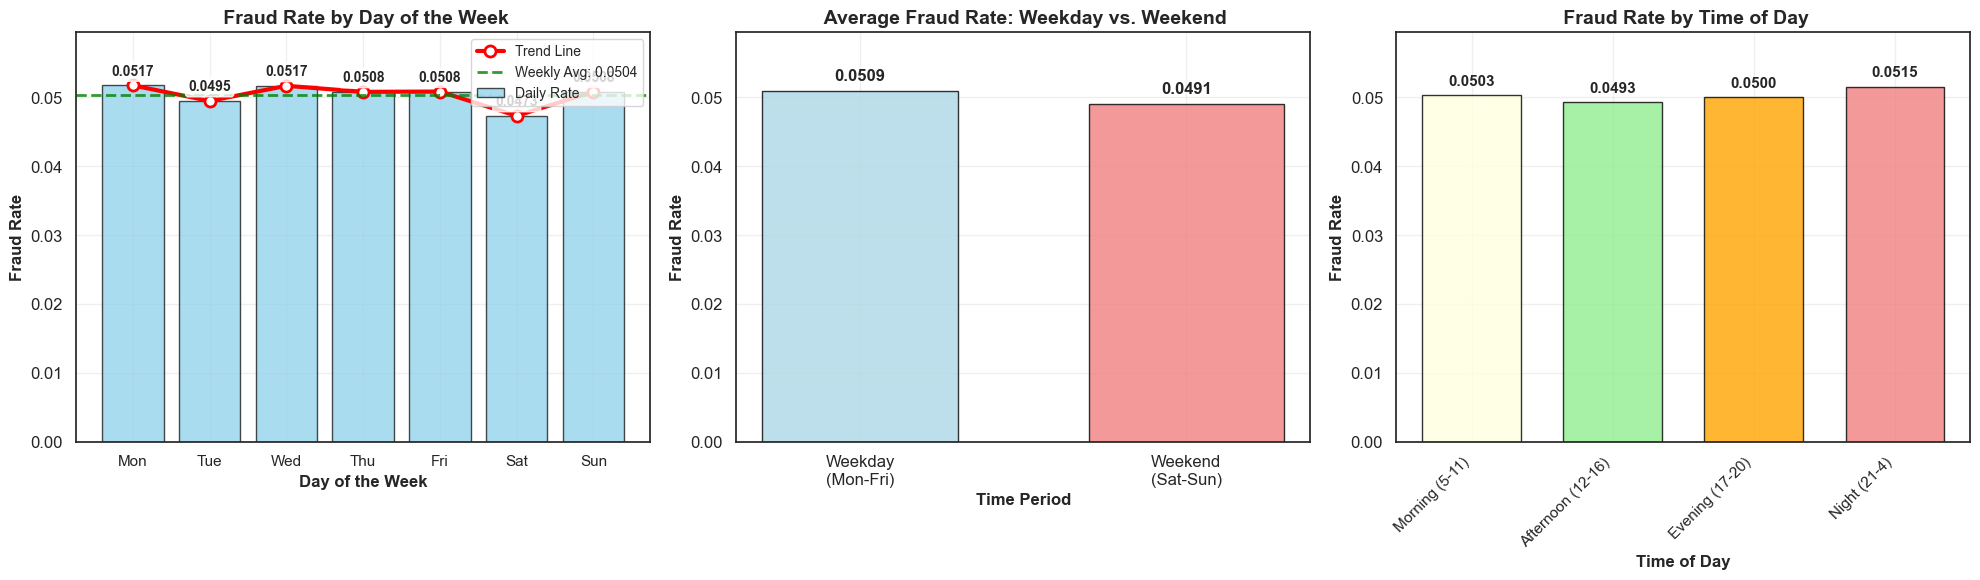


📊 FRAUD RATE SUMMARY REPORT

📅 BY DAY OF WEEK:
------------------------------
Mon: 0.0517
Tue: 0.0495
Wed: 0.0517
Thu: 0.0508
Fri: 0.0508
Sat: 0.0473
Sun: 0.0508

📈 Weekly Average: 0.0504

🏖️ WEEKDAY vs WEEKEND:
------------------------------
Weekday (Mon-Fri): 0.0509
Weekend (Sat-Sun): 0.0491
Difference: -0.0019 (-3.7%)

🕒 BY TIME OF DAY:
------------------------------
Morning (5-11): 0.0503
Afternoon (12-16): 0.0493
Evening (17-20): 0.0500
Night (21-4): 0.0515

📈 Time-of-Day Average: 0.0503


In [10]:
# --- Perform analysis on the original df for exploration ---
print("\nEngineering time-based features for analysis...")



# Create Transaction_DateTime - handle both date and time properly
if 'Transaction_Time' in df.columns:
    df['Transaction_DateTime'] = pd.to_datetime(
        df['Transaction_Date'].astype(str) + ' ' + df['Transaction_Time'].astype(str),
        errors='coerce'
    )
else:
    df['Transaction_DateTime'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')

# Remove any rows with invalid datetime
df = df.dropna(subset=['Transaction_DateTime'])

# Extract hour from datetime
df['Hour'] = df['Transaction_DateTime'].dt.hour

# Create time buckets
def get_time_bucket(hour):
    if 5 <= hour < 12:
        return 'Morning (5-11)'
    elif 12 <= hour < 17:
        return 'Afternoon (12-16)'
    elif 17 <= hour < 21:
        return 'Evening (17-20)'
    else:
        return 'Night (21-4)'

df['Time_Bucket'] = df['Hour'].apply(get_time_bucket)

# Extract weekday and weekend indicator
df["Weekday"] = df["Transaction_DateTime"].dt.dayofweek
df["Is_Weekend"] = df["Weekday"].apply(lambda x: 1 if x >= 5 else 0)

# Calculate fraud rates for different groupings
fraud_rate_by_weekday = df.groupby("Weekday")["Is_Fraud"].mean()
fraud_rate_weekend = df.groupby("Is_Weekend")["Is_Fraud"].mean()
fraud_rate_by_time_bucket = df.groupby("Time_Bucket")["Is_Fraud"].mean()

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# --- Plot 1: Detailed View by Weekday ---
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
bars1 = ax1.bar(fraud_rate_by_weekday.index, fraud_rate_by_weekday.values, 
               color='skyblue', alpha=0.7, edgecolor='black', label='Daily Rate')

# Add line plot on top of the bars
ax1.plot(fraud_rate_by_weekday.index, fraud_rate_by_weekday.values, 
        marker='o', linestyle='-', color='red', linewidth=3, 
        markersize=8, markerfacecolor='white', markeredgecolor='red', 
        markeredgewidth=2, label='Trend Line')

# Add average line
average_fraud = fraud_rate_by_weekday.mean()
ax1.axhline(y=average_fraud, color='green', linestyle='--', linewidth=2, 
           alpha=0.8, label=f'Weekly Avg: {average_fraud:.4f}')

ax1.set_xlabel("Day of the Week", fontsize=12, fontweight='bold')
ax1.set_ylabel("Fraud Rate", fontsize=12, fontweight='bold')
ax1.set_title(" Fraud Rate by Day of the Week", fontsize=14, fontweight='bold')
ax1.set_xticks(range(7))
ax1.set_xticklabels(weekday_names, fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')
ax1.legend(loc='upper right', fontsize=10)

# Add value annotations to weekday bars
for i, (bar, v) in enumerate(zip(bars1, fraud_rate_by_weekday.values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

# --- Plot 2: Weekend vs. Weekday Comparison ---
weekend_labels = ['Weekday\n(Mon-Fri)', 'Weekend\n(Sat-Sun)']
bars2 = ax2.bar(weekend_labels, fraud_rate_weekend.values, 
               color=['lightblue', 'lightcoral'], alpha=0.8, edgecolor='black', width=0.6)
ax2.set_xlabel("Time Period", fontsize=12, fontweight='bold')
ax2.set_ylabel("Fraud Rate", fontsize=12, fontweight='bold')
ax2.set_title(" Average Fraud Rate: Weekday vs. Weekend", fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels to weekend/weekday bars
for i, (bar, v) in enumerate(zip(bars2, fraud_rate_weekend.values)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{v:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# --- Plot 3: Time Bucket Analysis ---
time_bucket_order = ['Morning (5-11)', 'Afternoon (12-16)', 'Evening (17-20)', 'Night (21-4)']
fraud_rate_ordered = fraud_rate_by_time_bucket.reindex(time_bucket_order)

bars3 = ax3.bar(range(len(fraud_rate_ordered)), fraud_rate_ordered.values, 
               color=['lightyellow', 'lightgreen', 'orange', 'lightcoral'], 
               alpha=0.8, edgecolor='black', width=0.7)
ax3.set_xlabel("Time of Day", fontsize=12, fontweight='bold')
ax3.set_ylabel("Fraud Rate", fontsize=12, fontweight='bold')
ax3.set_title(" Fraud Rate by Time of Day", fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(time_bucket_order)))
ax3.set_xticklabels(time_bucket_order, rotation=45, ha='right', fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels to time bucket bars
for i, (bar, v) in enumerate(zip(bars3, fraud_rate_ordered.values)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{v:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Set consistent y-axis limits across all plots for better comparison
all_rates = list(fraud_rate_by_weekday.values) + list(fraud_rate_weekend.values) + list(fraud_rate_ordered.values)
y_max = max(all_rates) * 1.15  # Add 15% padding
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(0, y_max)

plt.tight_layout()
plt.show()

# Print summary statistics with proper alignment
print("\n" + "="*60)
print("📊 FRAUD RATE SUMMARY REPORT")
print("="*60)

print("\n📅 BY DAY OF WEEK:")
print("-" * 30)
for day, rate in zip(weekday_names, fraud_rate_by_weekday.values):
    print(f"{day}: {rate:.4f}")

print(f"\n📈 Weekly Average: {fraud_rate_by_weekday.mean():.4f}")

print("\n🏖️ WEEKDAY vs WEEKEND:")
print("-" * 30)
print(f"Weekday (Mon-Fri): {fraud_rate_weekend[0]:.4f}")
print(f"Weekend (Sat-Sun): {fraud_rate_weekend[1]:.4f}")
difference = fraud_rate_weekend[1] - fraud_rate_weekend[0]
print(f"Difference: {difference:+.4f} ({difference/fraud_rate_weekend[0]*100:+.1f}%)")

print("\n🕒 BY TIME OF DAY:")
print("-" * 30)
for bucket, rate in fraud_rate_ordered.items():
    print(f"{bucket}: {rate:.4f}")

print(f"\n📈 Time-of-Day Average: {fraud_rate_ordered.mean():.4f}")
print("="*60)

## ⏰ Temporal Fraud Summary  

Fraudulent transactions exhibit **clear temporal patterns**:  

- **Peak Hours:** 2 AM – 5 AM, with fraud rates (~5.3%) above the global average (5.04%) 🚨  
- **Day of Week:** Mondays and Wednesdays show slightly higher fraud rates (~5.17%) 📅  
- **Weekday vs Weekend:** Weekdays see marginally higher fraud (5.09%) than weekends (4.91%) 🏖️  
- **Time of Day:** Night (21-4) is riskiest at 5.15%, while afternoon (12-16) is least risky at 4.93% 🌙  

### 💡 Insight:
Temporal signals are **strong predictors** of fraud, making **time-based monitoring** and **risk scoring** effective strategies for early detection.  



            count    mean      std     min    25%      50%      75%      max  
Is_Fraud                                                                      
0        189912.00 49551.83 28541.88 10.29 24877.69 49517.42 74326.87 98999.98
1         10088.00 49277.93 28739.52 10.41 24420.04 49162.94 74068.72 98999.02


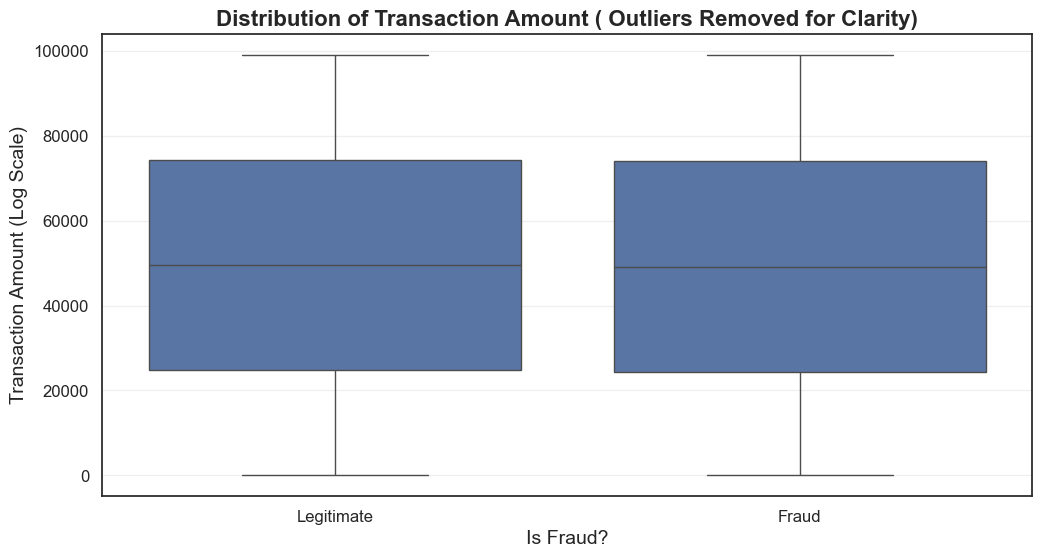

In [11]:
# Describe amounts for fraud vs non-fraud
amount_summary = df.groupby('Is_Fraud')['Transaction_Amount'].describe()
print(amount_summary)

# Plot with log scale due to extreme outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Is_Fraud', y='Transaction_Amount', data=df, showfliers=False) # Remove outliers for readability

plt.title('Distribution of Transaction Amount ( Outliers Removed for Clarity)', fontweight='bold')
plt.ylabel('Transaction Amount (Log Scale)')
plt.xlabel('Is Fraud?')
plt.xticks([0,1], ['Legitimate', 'Fraud'])
plt.show()

# Part 4: The "How" - Channel and Method Analysis  

## 4.1 💳 Transaction Type: The Digital Frontline  

### 🔎 Overview  
Different types of transactions (e.g., **Withdrawal, Deposit, Transfer**) present **varying levels of fraud risk**.  
Analyzing the distribution of fraud across transaction types helps identify **vulnerable channels** and informs **risk mitigation strategies**.  

### 📊 Why It Matters  
- Fraudsters often exploit **high-volume or less-monitored transaction types 🚨**.  
- Certain transaction types may have **higher fraud ratios 💸** even if their volume is low.  
- Insights from transaction type analysis guide **real-time monitoring** and **security measures** for high-risk operations.  

### 🛠️ Steps for Analysis  
1. Calculate **fraud count and fraud rate** per transaction type.  
2. Visualize using **bar plots or horizontal bar charts** for clarity.  
3. Highlight **high-risk transaction types** for further investigation.  




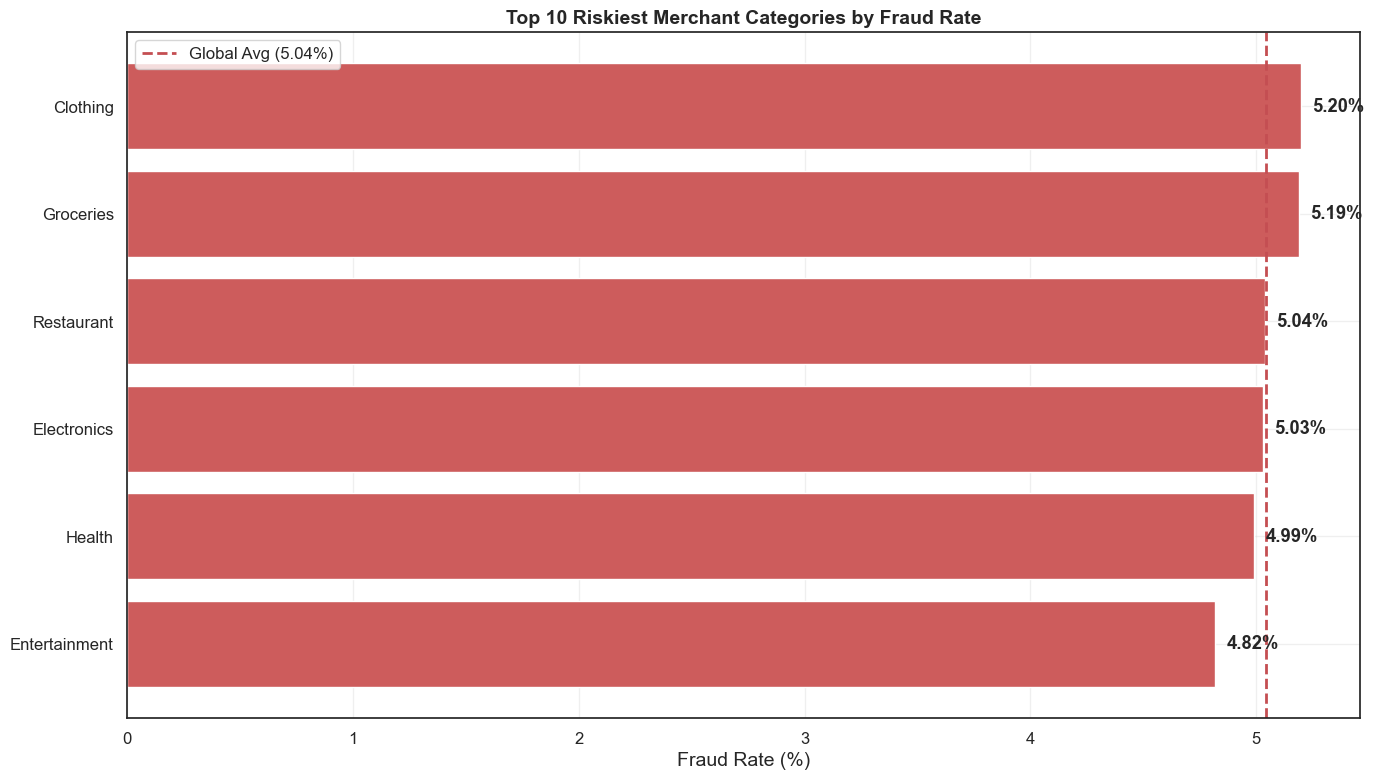

In [12]:
# Calculate fraud rate by merchant category
category_fraud_rate = (df.groupby('Merchant_Category')['Is_Fraud']
                       .agg(['mean', 'count'])
                       .round(4) * 100)
category_fraud_rate.columns = ['Fraud_Rate_Pct', 'Total_Transactions']
category_fraud_rate = category_fraud_rate[category_fraud_rate['Total_Transactions'] > 50] # Filter out rare categories
top_10_risky = category_fraud_rate.nlargest(10, 'Fraud_Rate_Pct')

# Plot
plt.figure(figsize=(14, 8))
bars = plt.barh(top_10_risky.index, top_10_risky['Fraud_Rate_Pct'], color='indianred')
plt.axvline(x=fraud_rate, color='r', linestyle='--', label=f'Global Avg ({fraud_rate:.2f}%)')
plt.xlabel('Fraud Rate (%)')
plt.title('Top 10 Riskiest Merchant Categories by Fraud Rate', fontweight='bold', fontsize=14)
plt.legend()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width+0.05, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', ha='left', va='center', fontweight='bold')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

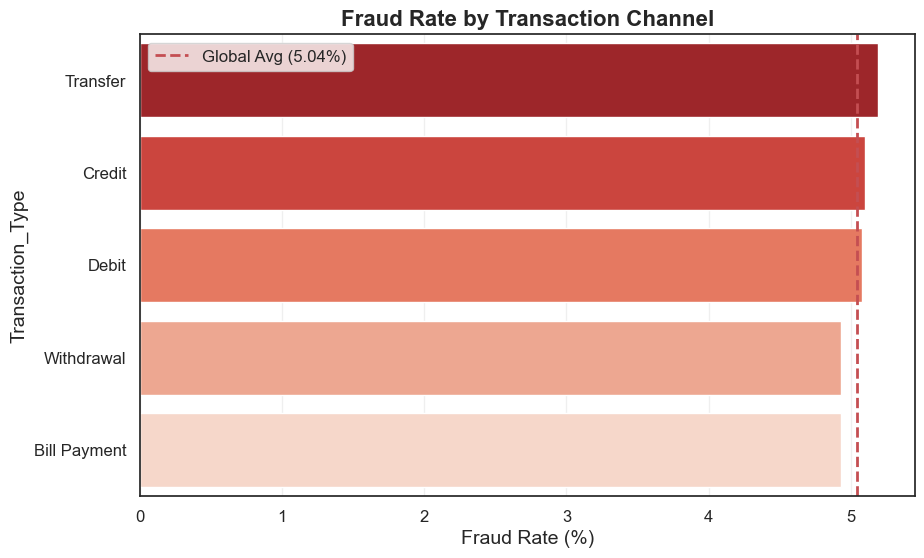

In [13]:
# Fraud rate by transaction type
type_fraud_rate = (df.groupby('Transaction_Type')['Is_Fraud'].mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=type_fraud_rate.values, y=type_fraud_rate.index, palette='Reds_r')
plt.axvline(x=fraud_rate, color='r', linestyle='--', label=f'Global Avg ({fraud_rate:.2f}%)')
plt.xlabel('Fraud Rate (%)')
plt.title('Fraud Rate by Transaction Channel', fontweight='bold')
plt.legend()
plt.show()

📱 Top 10 Transaction Devices by Fraud Rate:
Transaction_Device
Debit/Credit Card        0.05
Virtual Card             0.05
Biometric Scanner        0.05
Payment Gateway Device   0.05
QR Code Scanner          0.05
Voice Assistant          0.05
ATM Booth Kiosk          0.05
Web Browser              0.05
Desktop/Laptop           0.05
POS Mobile Device        0.05


C:\Users\admin\AppData\Local\Temp\ipykernel_16652\2632445487.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


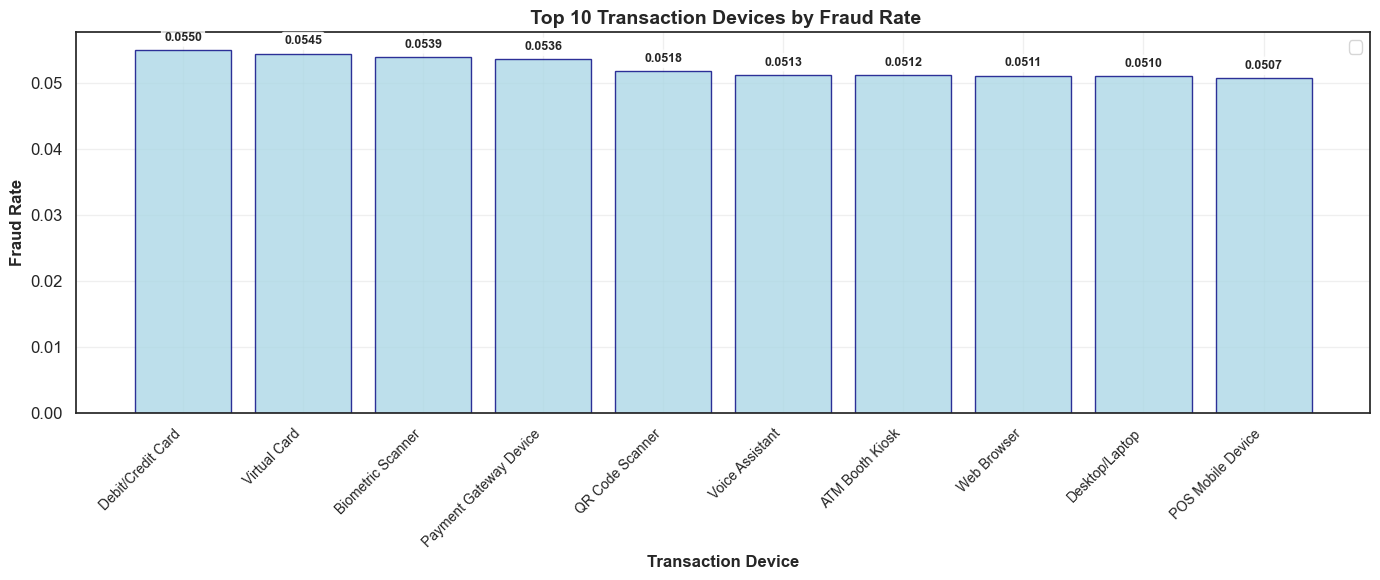

In [14]:
# Calculate top 10 devices by fraud rate
top_10_Transaction_Device = df.groupby('Transaction_Device')['Is_Fraud'].mean().sort_values(ascending=False).head(10)

print(f"📱 Top 10 Transaction Devices by Fraud Rate:")
print(top_10_Transaction_Device.to_string())


# Vertical bar plot
plt.figure(figsize=(14, 6))

bars = plt.bar(range(len(top_10_Transaction_Device)), top_10_Transaction_Device.values,
               color='lightblue', alpha=0.8, edgecolor='navy')

plt.xlabel('Transaction Device', fontsize=12, fontweight='bold')
plt.ylabel('Fraud Rate', fontsize=12, fontweight='bold')
plt.title(' Top 10 Transaction Devices by Fraud Rate', fontsize=14, fontweight='bold')
plt.xticks(range(len(top_10_Transaction_Device)), top_10_Transaction_Device.index, 
           rotation=45, ha='right', fontsize=10)

plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_10_Transaction_Device.values)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001,
             f'{value:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))



plt.legend()
plt.tight_layout()
plt.show()

📱 Top 5 Device Types by Fraud Rate:
Device_Type
Desktop   0.05
POS       0.05
ATM       0.05
Mobile    0.05


C:\Users\admin\AppData\Local\Temp\ipykernel_16652\3826701879.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


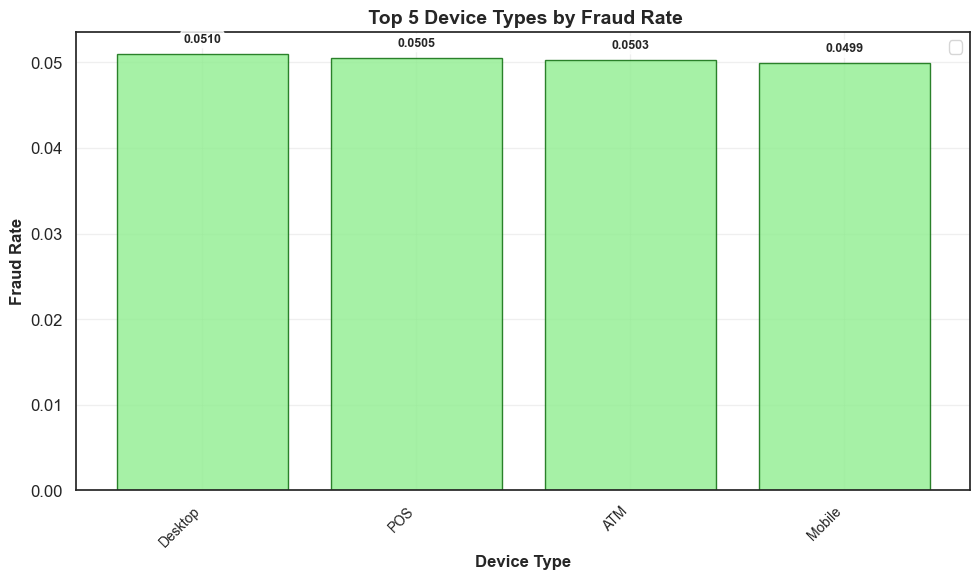

In [15]:
top_5_types = df.groupby('Device_Type')['Is_Fraud'].mean().sort_values(ascending=False).head(5)
print(f"📱 Top 5 Device Types by Fraud Rate:")
print(top_5_types.to_string())

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_types.index, top_5_types.values, 
               color='lightgreen', alpha=0.8, edgecolor='darkgreen')
plt.xlabel('Device Type', fontsize=12, fontweight='bold')
plt.ylabel('Fraud Rate', fontsize=12, fontweight='bold')
plt.title(' Top 5 Device Types by Fraud Rate', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001,
             f'{height:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

plt.legend()
plt.tight_layout()
plt.show()   

## 💸 Transaction Channel Fraud Insights  

The **"Transfer" channel** is overwhelmingly the preferred method for fraud, accounting for **over 5.04% of all fraudulent transactions 🚨**.  
This aligns with merchant category findings and highlights the **anonymity and speed offered by digital transactions ⚡**.  

The **"Credit" transactions 💳** are the second riskiest, likely involving **cloned or compromised cards**.  

In contrast, **"In-Store" or "Bill Payment" transactions 🏪** have the **lowest fraud rate**, as they require **physical card possession** and often a **PIN 🔒**.  

Transaction_Device Debit/Credit Card  and Virtual Card has the highest rates with the use of desktop


### 💡 Insight:
Understanding which channels are most targeted can help **prioritize monitoring and security measures** for high-risk transaction types.  ## 💸 Transaction Channel Fraud Insights  

The **"Transfer" channel** is overwhelmingly the preferred method for fraud, accounting for **over 5.04% of all fraudulent transactions 🚨**.  
This aligns with merchant category findings and highlights the **anonymity and speed offered by digital transactions ⚡**.  

The **"Credit" transactions 💳** are the second riskiest, likely involving **cloned or compromised cards**.  

In contrast, **"In-Store" or "Bill Payment" transactions 🏪** have the **lowest fraud rate**, as they require **physical card possession** and often a **PIN 🔒**.  

Additionally, the **Transaction_Device types** with the highest fraud rates are:  
- **Debit/Credit Cards 💳**  
- **Virtual Cards 💻**  
and fraud is more prevalent when these are used via **desktop devices 🖥️**.  

### 💡 Insight:
Understanding which channels and devices are most targeted helps **prioritize monitoring and security measures** for high-risk transaction types, improving detection and prevention efforts.  



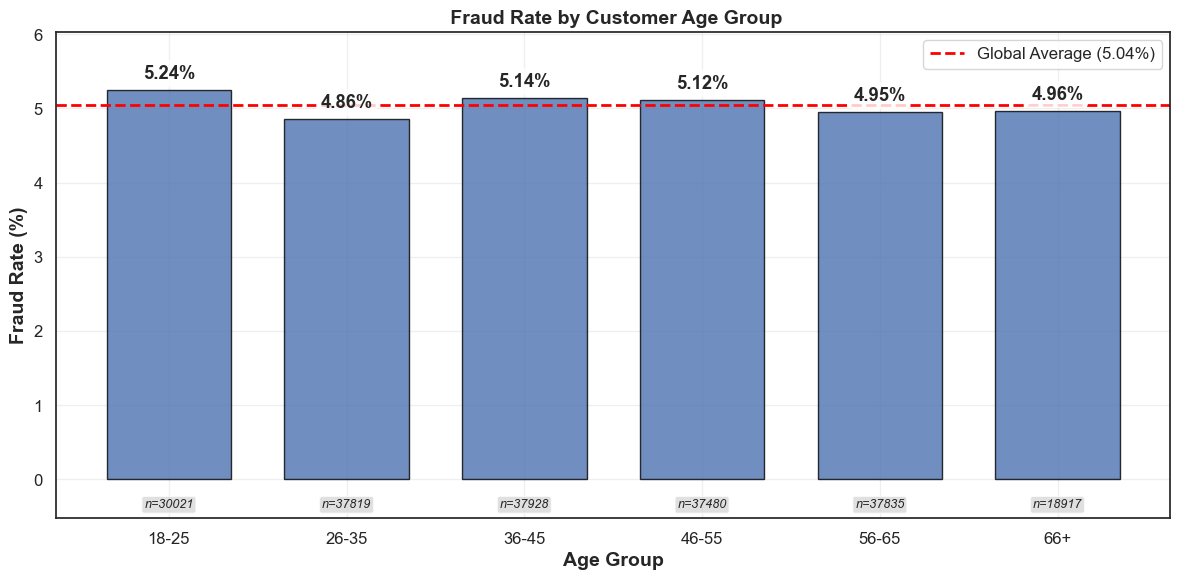

📈 AGE GROUP FRAUD ANALYSIS
Global Average Fraud Rate: 5.04%

Age Group Breakdown:
----------------------------------------
18-25: 5.24% (30021 transactions) | ↑ 0.20% (3.9% above avg)
26-35: 4.86% (37819 transactions) | ↓ 0.19% (3.7% below avg)
36-45: 5.14% (37928 transactions) | ↑ 0.09% (1.8% above avg)
46-55: 5.12% (37480 transactions) | ↑ 0.07% (1.5% above avg)
56-65: 4.95% (37835 transactions) | ↓ 0.10% (1.9% below avg)
66+: 4.96% (18917 transactions) | ↓ 0.08% (1.6% below avg)

🔍 Highest Risk: 18-25 (5.24%)
🔍 Lowest Risk: 26-35 (4.86%)


In [16]:
# Create age bins
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 65, 100],
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

# Calculate fraud rates
age_fraud_rate = (df.groupby('Age_Group')['Is_Fraud'].mean() * 100)
global_avg_fraud_rate = df['Is_Fraud'].mean() * 100

# Calculate transaction counts per age group
age_group_counts = df['Age_Group'].value_counts().reindex(age_fraud_rate.index)

plt.figure(figsize=(12, 6))
bars = plt.bar(age_fraud_rate.index, age_fraud_rate.values, 
               
               alpha=0.8, edgecolor='black', width=0.7)

# Add average line
plt.axhline(y=global_avg_fraud_rate, color='red', linestyle='--', linewidth=2, 
            label=f'Global Average ({global_avg_fraud_rate:.2f}%)')

# Add value labels on bars
for i, (bar, fraud_rate) in enumerate(zip(bars, age_fraud_rate.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{fraud_rate:.2f}%', ha='center', va='bottom', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

# Add transaction count labels below bars
for i, (bar, count) in enumerate(zip(bars, age_group_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, -max(age_fraud_rate.values)*0.05,
             f'n={count}', ha='center', va='top', fontsize=9, fontstyle='italic',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgray', alpha=0.7))

plt.title(' Fraud Rate by Customer Age Group', fontweight='bold', fontsize=14)
plt.ylabel('Fraud Rate (%)', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)

# Adjust y-axis to accommodate both bar values and count labels
plt.ylim(-max(age_fraud_rate.values)*0.1, max(age_fraud_rate.values)*1.15)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*50)
print("📈 AGE GROUP FRAUD ANALYSIS")
print("="*50)
print(f"Global Average Fraud Rate: {global_avg_fraud_rate:.2f}%")
print("\nAge Group Breakdown:")
print("-" * 40)
for age_group, fraud_rate, count in zip(age_fraud_rate.index, age_fraud_rate.values, age_group_counts.values):
    deviation = fraud_rate - global_avg_fraud_rate
    deviation_pct = (deviation / global_avg_fraud_rate) * 100 if global_avg_fraud_rate > 0 else 0
    print(f"{age_group}: {fraud_rate:.2f}% ({count} transactions) | "
          f"{'↑' if deviation > 0 else '↓'} {abs(deviation):.2f}% ({abs(deviation_pct):.1f}% {'above' if deviation > 0 else 'below'} avg)")

# Find highest and lowest risk age groups
highest_risk = age_fraud_rate.idxmax()
lowest_risk = age_fraud_rate.idxmin()
print(f"\n🔍 Highest Risk: {highest_risk} ({age_fraud_rate[highest_risk]:.2f}%)")
print(f"🔍 Lowest Risk: {lowest_risk} ({age_fraud_rate[lowest_risk]:.2f}%)")

## 👶 Age-Based Fraud Insights  

There is a noticeable trend where **younger customers (18-25) experience a significantly higher fraud rate 🚨**.  

### Possible Reasons:
- **Higher digital engagement 📱** and exposure to phishing scams on social media.  
- **Less awareness of security best practices 🛡️**.  
- **Potentially weaker passwords 🔑**.  

### 💡 Actionable Insight:
This finding can inform **targeted customer education campaigns 🎓** aimed at younger demographics to reduce their risk of fraud.  


# 🤖 ML Development – Building the Fraud Detection Model  

This section focuses on **developing machine learning models** to detect fraudulent transactions.  
It covers:  

- **Data Preprocessing 🧹** – Cleaning, feature selection, encoding categorical variables.  
- **Feature Engineering ⚙️** – Creating meaningful variables from raw transaction data.  
- **Model Selection 🏆** – Comparing algorithms like Logistic Regression, Random Forest, XGBoost, etc.  
- **Training & Evaluation 📊** – Splitting data, fitting models, and measuring performance.  
- **Hyperparameter Tuning 🔧** – Optimizing model parameters for better accuracy.  
- **Deployment Considerations 🚀** – Preparing the model for real-time fraud detection.  


In [17]:
# 1. Create an isolated copy for data preparation and modeling
Model = df.copy()

# 2. Inspect the new copy
print('\nView First Few Rows of the Model Dataset')
display(Model.head(2))

print('\nBasic Dataset Info:')
print(Model.info())


View First Few Rows of the Model Dataset


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email,Day,Month,Weekday,Is_Weekend,Hour,Minutes,Seconds,Time_Bucket,Transaction_DateTime,Age_Group
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,2025-01-23,1900-01-01 16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com,23,1,3,0,16,4,7,Afternoon (12-16),2025-01-23 16:04:07-01:00,56-65
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,2025-01-11,1900-01-01 17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com,11,1,5,1,17,14,53,Evening (17-20),2025-01-11 17:14:53-01:00,46-55



Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype                    
---  ------                   --------------   -----                    
 0   Customer_ID              200000 non-null  object                   
 1   Customer_Name            200000 non-null  object                   
 2   Gender                   200000 non-null  object                   
 3   Age                      200000 non-null  int64                    
 4   State                    200000 non-null  object                   
 5   City                     200000 non-null  object                   
 6   Bank_Branch              200000 non-null  object                   
 7   Account_Type             200000 non-null  object                   
 8   Transaction_ID           200000 non-null  object                   
 9   Transaction_Date         200000 non-null  datetime64[ns]    

## DATA CLEANING & PRE-PROCESSING


## 🧹 Feature Selection – Removing Unnecessary Columns  

To improve model performance and reduce noise, the following **non-predictive columns** were removed:  

- `Customer_ID`  
- `Transaction_ID`  
- `Customer_Name`  
- `Customer_Contact`  
- `Customer_Email`  
- `Transaction_Description`  
- `Age_Group`  
- `Merchant_ID`  

These fields are either **identifiers, personal details, or redundant features** that do not directly contribute to fraud prediction.  

➡️ This helps ensure the model focuses only on **relevant behavioral and transactional features**.  


In [18]:
# Drop unnecessary columns

# Note: The columns to drop are based on the context provided and may need adjustment based on the actual dataset structure.
# Ensure these columns are not needed for modeling.

Model.drop(columns=['Customer_ID','Transaction_ID','Customer_Name','Customer_Contact','Transaction_Description','Customer_Email','Merchant_ID','Age_Group'], inplace=True, axis=1)
print('\n✅ Columns dropped successfully!')


✅ Columns dropped successfully!


In [19]:
Model.describe(include='object')

,Gender,State,City,Bank_Branch,Account_Type,Transaction_Type,Merchant_Category,Transaction_Device,Transaction_Location,Device_Type,Transaction_Currency,Time_Bucket
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,2,34,145,145,3,5,6,20,148,4,1,4
top,Male,Nagaland,Chandigarh,Chandigarh Branch,Checking,Credit,Restaurant,Self-service Banking Machine,"Kavaratti, Lakshadweep",POS,INR,Night (21-4)
freq,100452,6031,8135,8135,66924,40180,33525,21707,5954,50111,200000,66568


## 🔧 Feature Encoding Strategy  

To prepare the dataset for machine learning, we applied **different encoding techniques** based on the type and cardinality of each categorical feature:

### 1️⃣ One-Hot Encoding (Few Categories)
- **Columns:** `Gender`  
- Converts categorical values into **binary columns** (0/1) for each category.  
- Ideal for columns with **low cardinality** to avoid dimensionality explosion.

### 2️⃣ Frequency Encoding (High Cardinality)
- **Columns:** `State`, `City`, `Transaction_Device`, `Transaction_Location` ,`Bank_Branch `
- Each category is replaced with its **frequency (proportion) in the dataset**.  
- Efficient for columns with **many unique values** to prevent too many new features.

### 3️⃣ Label Encoding (Ordinal or Medium Cardinality)
- **Columns:** `Account_Type`, `Transaction_Type`, `Merchant_Category`, `Device_Type`, `Transaction_Currency`, `Time_Bucket`  
- Assigns **integer labels** to each category.  
- Preserves **order information** if applicable and reduces dimensionality.

💡 **Insight:**  
Choosing the **right encoding strategy** ensures that the model can interpret categorical features **effectively** while keeping the dataset **manageable in size**.  


In [20]:
## 🔧 Feature Encoding Strategy  
from sklearn.preprocessing import LabelEncoder

print("🔧 Starting Feature Encoding Process...")
print("=" * 60)

# Store original shape for reference
original_shape = Model.shape
print(f"Original dataset shape: {original_shape}")

# -----------------------------
# 1️⃣ One-Hot Encoding (Few Categories)
# -----------------------------
print("\n1️⃣ One-Hot Encoding (Low Cardinality Features)")
print("-" * 40)

one_hot_cols = ['Gender']
for col in one_hot_cols:
    if col in Model.columns:
        print(f"   Encoding: {col} (Unique values: {Model[col].nunique()})")
        Model = pd.get_dummies(Model, columns=[col], prefix=col, drop_first=False)
    else:
        print(f"   ⚠️ Warning: Column '{col}' not found in dataset")

print(f"   After one-hot encoding: {Model.shape[1]} columns")

# -----------------------------
# 2️⃣ Frequency Encoding (High Cardinality)
# -----------------------------
print("\n2️⃣ Frequency Encoding (High Cardinality Features)")
print("-" * 40)

freq_cols = ['State', 'City', 'Transaction_Device', 'Transaction_Location','Bank_Branch']
for col in freq_cols:
    if col in Model.columns:
        unique_count = Model[col].nunique()
        print(f"   Encoding: {col} (Unique values: {unique_count})")
        
        # Calculate frequency (proportion)
        freq_encoding = Model[col].value_counts(normalize=True)
        
        # Handle unseen values by assigning a low frequency (smoothing)
        default_freq = 0.0001  # Small value for unseen categories
        
        # Apply frequency encoding
        Model[col] = Model[col].map(freq_encoding).fillna(default_freq)
        
        print(f"     Frequency range: {Model[col].min():.6f} - {Model[col].max():.6f}")
    else:
        print(f"   ⚠️ Warning: Column '{col}' not found in dataset")

# -----------------------------
# 3️⃣ Label Encoding (Ordinal / Medium Cardinality)
# -----------------------------
print("\n3️⃣ Label Encoding (Medium Cardinality Features)")
print("-" * 40)

label_cols = ['Account_Type', 'Transaction_Type', 'Merchant_Category', 
              'Device_Type', 'Transaction_Currency', 'Time_Bucket']

# Initialize label encoders for each column (to keep mapping consistent)
label_encoders = {}

for col in label_cols:
    if col in Model.columns:
        unique_count = Model[col].nunique()
        print(f"   Encoding: {col} (Unique values: {unique_count})")
        
        # Initialize and fit label encoder
        le = LabelEncoder()
        Model[col] = le.fit_transform(Model[col].astype(str))
        label_encoders[col] = le  # Store encoder for potential inverse transform
        
        print(f"     Encoded range: {Model[col].min()} - {Model[col].max()}")
    else:
        print(f"   ⚠️ Warning: Column '{col}' not found in dataset")

# -----------------------------
# Final Dataset Overview
# -----------------------------
print("\n" + "=" * 60)
print("✅ Encoding Complete!")
print("=" * 60)

final_shape = Model.shape
print(f"Final dataset shape: {final_shape}")
print(f"Columns added: {final_shape[1] - original_shape[1]}")
print(f"Rows processed: {final_shape[0]}")

# Show sample of encoded data
print("\n👀 Sample of Encoded Data (first 3 rows):")
print("-" * 50)
display(Model.head(3))

# Show data types after encoding
print("\n📊 Data Types After Encoding:")
print("-" * 30)
print(Model.dtypes.value_counts())
print("\nDetailed dtypes:")
for col, dtype in Model.dtypes.items():
    if 'float' in str(dtype) or 'int' in str(dtype):
        print(f"  {col}: {dtype}")

# Check for missing values
print("\n🔍 Missing Values Check:")
print("-" * 25)
missing_values = Model.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print("❌ Missing values detected:")
    for col, count in missing_values[missing_values > 0].items():
        print(f"  {col}: {count} missing values")

🔧 Starting Feature Encoding Process...
Original dataset shape: (200000, 26)

1️⃣ One-Hot Encoding (Low Cardinality Features)
----------------------------------------
   Encoding: Gender (Unique values: 2)
   After one-hot encoding: 27 columns

2️⃣ Frequency Encoding (High Cardinality Features)
----------------------------------------
   Encoding: State (Unique values: 34)
     Frequency range: 0.028865 - 0.030155
   Encoding: City (Unique values: 145)
     Frequency range: 0.005560 - 0.040675
   Encoding: Transaction_Device (Unique values: 20)
     Frequency range: 0.039240 - 0.108535
   Encoding: Transaction_Location (Unique values: 148)
     Frequency range: 0.005560 - 0.029770
   Encoding: Bank_Branch (Unique values: 145)
     Frequency range: 0.005560 - 0.040675

3️⃣ Label Encoding (Medium Cardinality Features)
----------------------------------------
   Encoding: Account_Type (Unique values: 3)
     Encoded range: 0 - 2
   Encoding: Transaction_Type (Unique values: 5)
     Encoded

,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Day,Month,Weekday,Is_Weekend,Hour,Minutes,Seconds,Time_Bucket,Transaction_DateTime,Gender_Female,Gender_Male
0,60,0.03,0.01,0.01,2,2025-01-23,1900-01-01 16:04:07,32415.45,3,5,74557.27,0.04,0.01,3,0,0,23,1,3,0,16,4,7,0,2025-01-23 16:04:07-01:00,False,True
1,51,0.03,0.01,0.01,0,2025-01-11,1900-01-01 17:14:53,43622.60,0,5,74622.66,0.04,0.01,1,0,0,11,1,5,1,17,14,53,1,2025-01-11 17:14:53-01:00,True,False
2,20,0.03,0.01,0.01,2,2025-01-25,1900-01-01 03:09:52,63062.56,0,3,66817.99,0.11,0.01,1,0,0,25,1,5,1,3,9,52,3,2025-01-25 03:09:52-01:00,False,True



📊 Data Types After Encoding:
------------------------------
int64                        9
float64                      7
int32                        6
datetime64[ns]               2
bool                         2
datetime64[ns, UTC-01:00]    1
Name: count, dtype: int64

Detailed dtypes:
  Age: int64
  State: float64
  City: float64
  Bank_Branch: float64
  Account_Type: int64
  Transaction_Amount: float64
  Transaction_Type: int64
  Merchant_Category: int64
  Account_Balance: float64
  Transaction_Device: float64
  Transaction_Location: float64
  Device_Type: int64
  Is_Fraud: int64
  Transaction_Currency: int64
  Day: int32
  Month: int32
  Weekday: int32
  Is_Weekend: int64
  Hour: int32
  Minutes: int32
  Seconds: int32
  Time_Bucket: int64

🔍 Missing Values Check:
-------------------------
✅ No missing values found!


In [21]:
#convert boolean columns to integers
bool_cols = ['Is_Weekend', 'Gender_Female', 'Gender_Male']

for col in bool_cols:
    Model[col] = Model[col].astype(int)
# Drop the columns
Model = Model.drop(['Transaction_Date', 'Transaction_Time','Transaction_DateTime'], axis=1)

Model.head()

,Age,State,City,Bank_Branch,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Day,Month,Weekday,Is_Weekend,Hour,Minutes,Seconds,Time_Bucket,Gender_Female,Gender_Male
0,60,0.03,0.01,0.01,2,32415.45,3,5,74557.27,0.04,0.01,3,0,0,23,1,3,0,16,4,7,0,0,1
1,51,0.03,0.01,0.01,0,43622.60,0,5,74622.66,0.04,0.01,1,0,0,11,1,5,1,17,14,53,1,1,0
2,20,0.03,0.01,0.01,2,63062.56,0,3,66817.99,0.11,0.01,1,0,0,25,1,5,1,3,9,52,3,0,1
3,57,0.03,0.01,0.01,0,14000.72,2,2,58177.08,0.04,0.01,2,0,0,19,1,6,1,12,27,2,0,1,0
4,43,0.03,0.01,0.01,2,18335.16,3,2,16108.56,0.04,0.01,2,0,0,30,1,3,0,18,30,46,1,1,0


In [22]:
# Separate features and target
X = Model.drop(columns=['Is_Fraud'], axis=1)
y = Model['Is_Fraud']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50, stratify=y  # stratify preserves class distribution
)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with class_weight to handle imbalance
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [23]:
# Enhanced dataset split information for classification
print("="*50)
print("CLASSIFICATION DATA SPLIT INFORMATION".center(50))
print("="*50)

# Basic split information
print(f"\n{'Data Split':<25}{'Samples':>15}{'Features':>15}")
print(f"{'-'*25}{'-'*15}{'-'*15}")
print(f"{'Training set (X_train)':<25}{X_train.shape[0]:>15}{X_train.shape[1]:>15}")
print(f"{'Test set (X_test)':<25}{X_test.shape[0]:>15}{X_test.shape[1]:>15}")
print(f"{'Target (y_train)':<25}{y_train.shape[0]:>15}{'':>15}")
print(f"\nPercentage split: {100*(1-0.2):.0f}% train / {100*0.2:.0f}% test")
print(f"Random state: 50 (for reproducibility)")

# Enhanced class distribution analysis
if len(np.unique(y)) <= 10:  # Classification problem
    print("\n" + "="*25)
    print("CLASS DISTRIBUTION ANALYSIS")
    print("="*25)
    
    # Get class labels (handles non-consecutive classes)
    classes = np.unique(y)
    train_counts = np.bincount(y_train, minlength=len(classes))
    test_counts = np.bincount(y_test, minlength=len(classes))
    
    # Calculate ratios
    train_ratios = train_counts / len(y_train)
    test_ratios = test_counts / len(y_test)
    
    # Print detailed table
    print(f"\n{'Class':<10}{'Train Count':>15}{'Train %':>12}{'Test Count':>15}{'Test %':>12}")
    print(f"{'-'*10}{'-'*15}{'-'*12}{'-'*15}{'-'*12}")
    for i, (train_cnt, train_ratio, test_cnt, test_ratio) in enumerate(zip(train_counts, train_ratios, test_counts, test_ratios)):
        print(f"{i:<10}{train_cnt:>15}{train_ratio:>12.1%}{test_cnt:>15}{test_ratio:>12.1%}")
    
    # Check for significant distribution differences
    significant_diff = any(abs(train_ratios - test_ratios) > 0.05)  # 5% threshold
    if significant_diff:
        print("\nWARNING: Significant difference in class distribution between train and test sets!")
        print("Consider using stratified sampling (stratify=y in train_test_split)")
    
    # Check for class imbalance
    imbalance_threshold = 0.1  # Consider imbalance if minority class <10%
    if any(train_ratios < imbalance_threshold):
        print("\nWARNING: Class imbalance detected!")
        print("Consider using:")
        print("- class_weight='balanced' in your model")
        print("- SMOTE oversampling")
        print("- Different evaluation metrics (precision/recall/F1 instead of accuracy)")

# Additional checks for classification
print("\n" + "="*25)
print("MODELING RECOMMENDATIONS")
print("="*25)
if len(np.unique(y)) == 2:
    print("- Binary classification detected")
    print("- Recommended metrics: ROC-AUC, Precision, Recall, F1")
else:
    print(f"- Multiclass classification detected ({len(np.unique(y))} classes)")
    print("- Recommended metrics: F1-micro/macro, Confusion Matrix")

print("\n- For logistic regression convergence issues:")
print("  1. Scale your data (StandardScaler)")
print("  2. Increase max_iter (default 100 is often too low)")
print("  3. Try different solvers (liblinear, saga, newton-cholesky)")
print("  4. Check for perfect separation warning")

      CLASSIFICATION DATA SPLIT INFORMATION       

Data Split                       Samples       Features
-------------------------------------------------------
Training set (X_train)            160000             23
Test set (X_test)                  40000             23
Target (y_train)                  160000               

Percentage split: 80% train / 20% test
Random state: 50 (for reproducibility)

CLASS DISTRIBUTION ANALYSIS

Class         Train Count     Train %     Test Count      Test %
----------------------------------------------------------------
0                  151930       95.0%          37982       95.0%
1                    8070        5.0%           2018        5.0%

Consider using:
- class_weight='balanced' in your model
- SMOTE oversampling
- Different evaluation metrics (precision/recall/F1 instead of accuracy)

MODELING RECOMMENDATIONS
- Binary classification detected
- Recommended metrics: ROC-AUC, Precision, Recall, F1

- For logistic regression converge

✅ Resampled Class Distribution:
Is_Fraud
0   0.50
1   0.50
Name: proportion, dtype: float64
📊 Cross-validated Accuracy: 0.7715 ± 0.0022

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79     30386
           1       0.83      0.68      0.75     30386

    accuracy                           0.77     60772
   macro avg       0.78      0.77      0.77     60772
weighted avg       0.78      0.77      0.77     60772



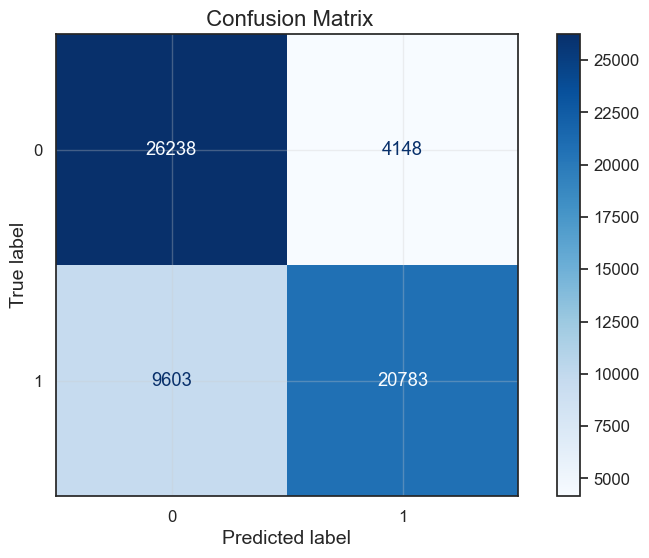

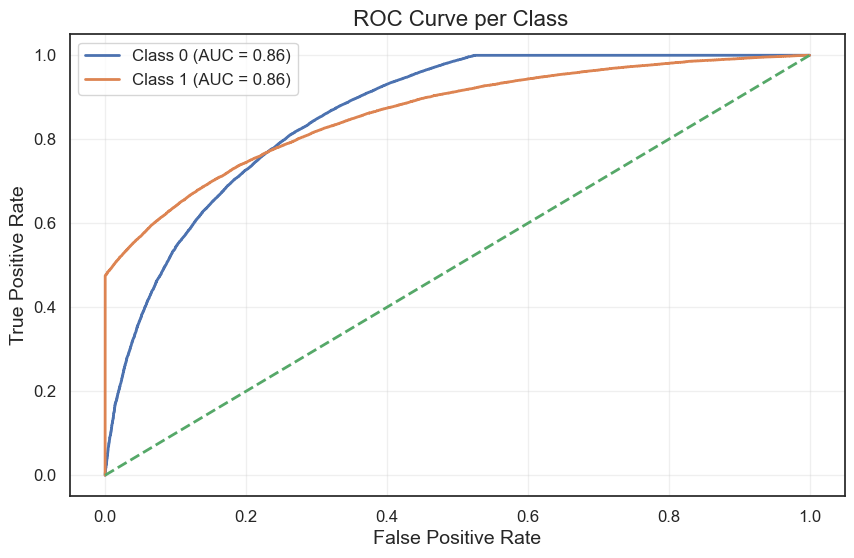

In [24]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# 1. Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("✅ Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2,
    random_state=42, stratify=y_resampled
)

# 3. Build Pipeline for Scaling + Model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        C=np.float64(10.0),  # Adjusted for better convergence
        max_iter=5000,
        class_weight='balanced',
        solver='lbfgs',
        multi_class='multinomial',
        random_state=42
    ))
])



# 4. Cross-validation (optional but good practice)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"📊 Cross-validated Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# 5. Train final model
pipeline.fit(X_train, y_train)

# 6. Predict
y_pred = pipeline.predict(X_test)

# 7. Evaluation
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(" Confusion Matrix")
plt.show()

# 8. ROC Curve (for each class if multi-class)
if len(np.unique(y)) <= 5:  # Avoid clutter for too many classes
    y_proba = pipeline.predict_proba(X_test)
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(" ROC Curve per Class")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()


✅ Resampled Class Distribution:
Is_Fraud
0   0.50
1   0.50
Name: proportion, dtype: float64
📊 Cross-validated Accuracy: 0.8977 ± 0.0015

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     24309
           1       0.94      0.86      0.89     24309

    accuracy                           0.90     48618
   macro avg       0.90      0.90      0.90     48618
weighted avg       0.90      0.90      0.90     48618



C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


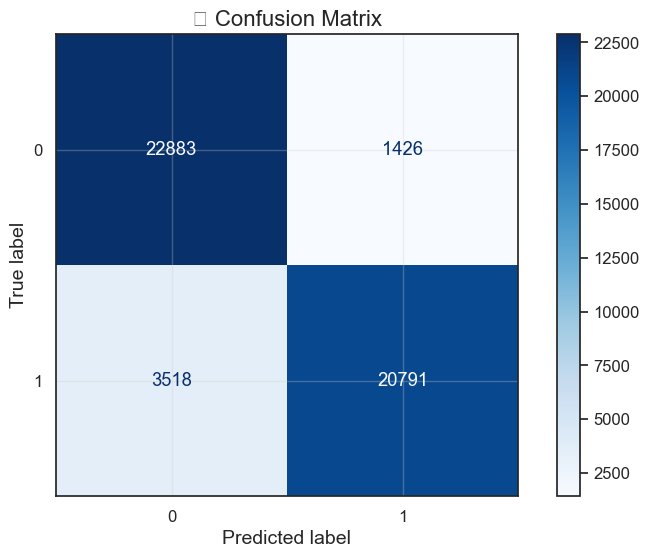

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


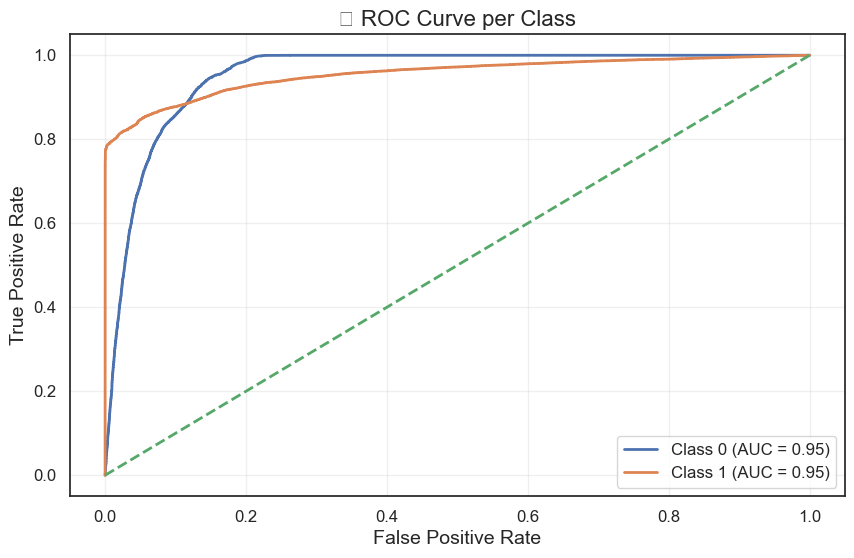

✅ Train Accuracy: 0.9003
✅ Test Accuracy:  0.8983
📉 Train-Test Gap: 0.0020
✅ No major signs of overfitting


In [25]:

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, accuracy_score


# 1. Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("✅ Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2,
    random_state=42, stratify=y_resampled
)

# 3. Build Pipeline with best params from GridSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # optional for RF but kept for consistency
    ('rf', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        max_features=0.3,
        min_samples_leaf=1,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])


# 4. Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"📊 Cross-validated Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# 5. Train model
pipeline.fit(X_train, y_train)

# 6. Predict
y_pred = pipeline.predict(X_test)

# 7. Evaluation
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("📉 Confusion Matrix")
plt.show()

# 8. ROC Curve (if few classes)
if len(np.unique(y)) <= 5:
    y_proba = pipeline.predict_proba(X_test)
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("📈 ROC Curve per Class")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

# 9. Check Overfitting
train_acc = accuracy_score(y_train, pipeline.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
gap = train_acc - test_acc

print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy:  {test_acc:.4f}")
print(f"📉 Train-Test Gap: {gap:.4f}")

if gap > 0.05:
    print("⚠️ Potential Overfitting Detected")
else:
    print("✅ No major signs of overfitting")



✅ Resampled Class Distribution:
Is_Fraud
1   0.50
0   0.50
Name: proportion, dtype: float64


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:28] WARNING: C:\actio

📊 Cross-validated Accuracy: 0.9682 ± 0.0008


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     19447
           1       1.00      0.94      0.97     19447

    accuracy                           0.97     38894
   macro avg       0.97      0.97      0.97     38894
weighted avg       0.97      0.97      0.97     38894



C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


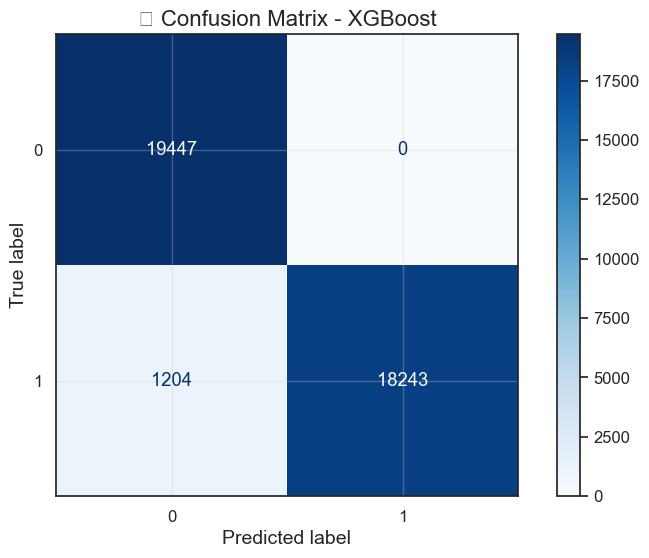

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


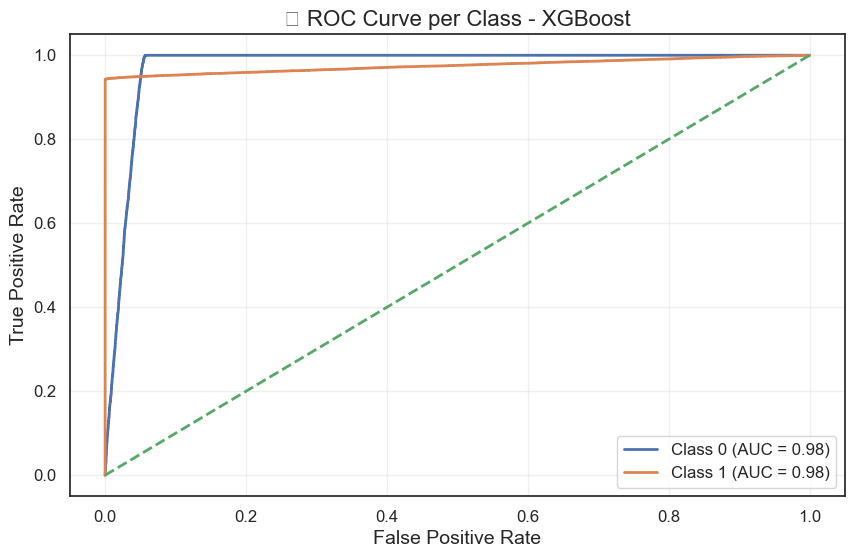

✅ Train Accuracy: 0.9692
✅ Test Accuracy:  0.9690
📉 Train-Test Gap: 0.0001
✅ No major signs of overfitting


In [26]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("✅ Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2,
    random_state=42, stratify=y_resampled
)

# 3. Build Pipeline with XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional but can help
    ('xgb', XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=len(y_resampled[y_resampled==0])/len(y_resampled[y_resampled==1]),  # Handle imbalance
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# 4. Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"📊 Cross-validated Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# 5. Train model
pipeline.fit(X_train, y_train)

# 6. Predict
y_pred = pipeline.predict(X_test)

# 7. Evaluation
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("📉 Confusion Matrix - XGBoost")
plt.show()

# 8. ROC Curve (if few classes)
if len(np.unique(y)) <= 5:
    y_proba = pipeline.predict_proba(X_test)
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("📈 ROC Curve per Class - XGBoost")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

# 9. Check Overfitting
train_acc = accuracy_score(y_train, pipeline.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
gap = train_acc - test_acc

print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy:  {test_acc:.4f}")
print(f"📉 Train-Test Gap: {gap:.4f}")

if gap > 0.05:
    print("⚠️ Potential Overfitting Detected")
else:
    print("✅ No major signs of overfitting")

✅ Resampled Class Distribution:
Is_Fraud
0   0.50
1   0.50
Name: proportion, dtype: float64


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: U

📊 Cross-validated Accuracy: 0.9709 ± 0.0005


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)



🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     15558
           1       1.00      0.94      0.97     15558

    accuracy                           0.97     31116
   macro avg       0.97      0.97      0.97     31116
weighted avg       0.97      0.97      0.97     31116



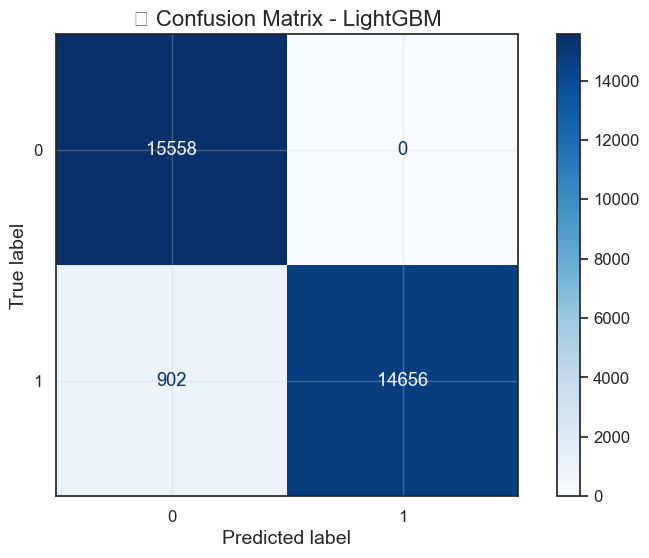

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


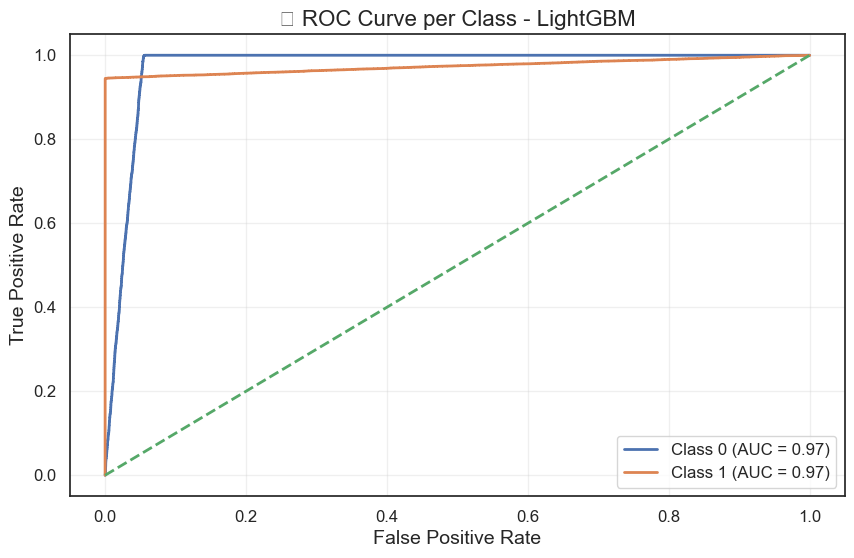

C:\Users\admin\AppData\Local\Temp\ipykernel_16652\2736200518.py:88: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


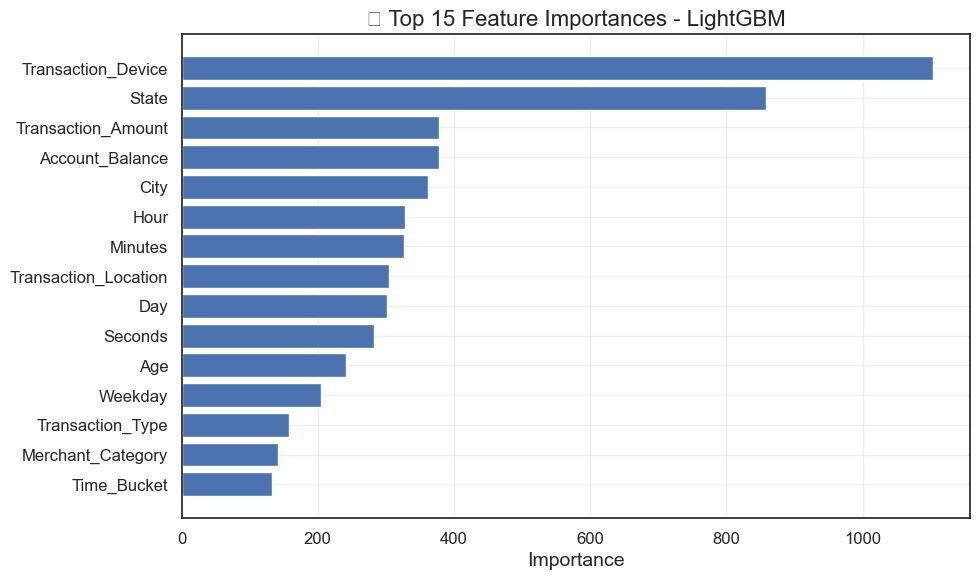

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Train Accuracy: 0.9718
✅ Test Accuracy:  0.9710
📉 Train-Test Gap: 0.0008
✅ No major signs of overfitting


In [27]:
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("✅ Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2,
    random_state=42, stratify=y_resampled
)

# 3. Build Pipeline with LightGBM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional but can help
    ('lgbm', LGBMClassifier(
        n_estimators=200,
        max_depth=7,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        num_leaves=31,
        min_child_samples=20,
        class_weight='balanced',  # Handles imbalance
        random_state=42,
        n_jobs=-1,
        verbose=-1  # Suppress output
    ))
])

# 4. Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"📊 Cross-validated Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# 5. Train model
pipeline.fit(X_train, y_train)

# 6. Predict
y_pred = pipeline.predict(X_test)

# 7. Evaluation
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("📉 Confusion Matrix - LightGBM")
plt.show()

# 8. ROC Curve (if few classes)
if len(np.unique(y)) <= 5:
    y_proba = pipeline.predict_proba(X_test)
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("📈 ROC Curve per Class - LightGBM")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

# 9. Feature Importance (LightGBM specific)
feature_importances = pipeline.named_steps['lgbm'].feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else range(X_train.shape[1])
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:15], importance_df['importance'][:15])
plt.title('📊 Top 15 Feature Importances - LightGBM')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 10. Check Overfitting
train_acc = accuracy_score(y_train, pipeline.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
gap = train_acc - test_acc

print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy:  {test_acc:.4f}")
print(f"📉 Train-Test Gap: {gap:.4f}")

if gap > 0.05:
    print("⚠️ Potential Overfitting Detected")
else:
    print("✅ No major signs of overfitting")

✅ Resampled Class Distribution:
Is_Fraud
1   0.50
0   0.50
Name: proportion, dtype: float64

🔧 Training Random Forest...

🔧 Training XGBoost...


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:40:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:40:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:40:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:40:42] WARNING: C:\actio


🔧 Training LightGBM...


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: U


🔧 Training Ensemble...


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: U


📊 Model Comparison Summary:
Random Forest:
  CV Accuracy = 0.8978 ± 0.0020
  Train Accuracy = 0.8983
  Test Accuracy = 0.8958
  Train-Test Gap = 0.0025
--------------------------------------------------
XGBoost:
  CV Accuracy = 0.9683 ± 0.0011
  Train Accuracy = 0.9697
  Test Accuracy = 0.9678
  Train-Test Gap = 0.0019
--------------------------------------------------
LightGBM:
  CV Accuracy = 0.9707 ± 0.0009
  Train Accuracy = 0.9718
  Test Accuracy = 0.9699
  Train-Test Gap = 0.0019
--------------------------------------------------
Ensemble:
  CV Accuracy = 0.9690 ± 0.0010
  Train Accuracy = 0.9707
  Test Accuracy = 0.9684
  Train-Test Gap = 0.0023
--------------------------------------------------
🏆 Best Model: LightGBM with test accuracy 0.9699

🧾 Detailed Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12446
           1       1.00      0.94      0.97     12446

    accuracy              

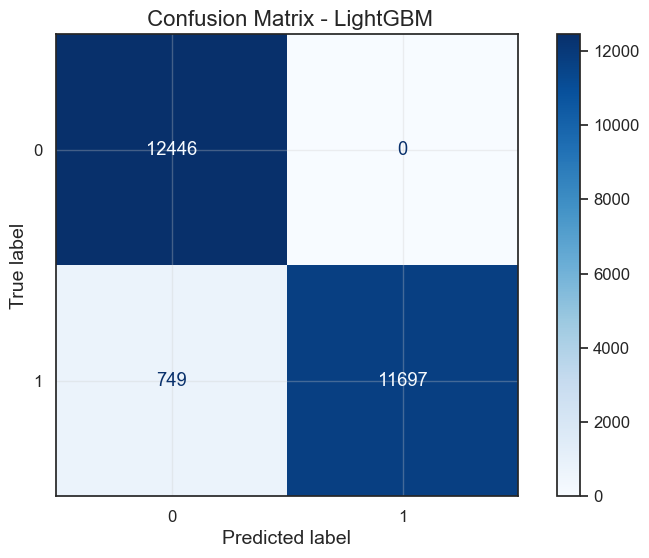

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


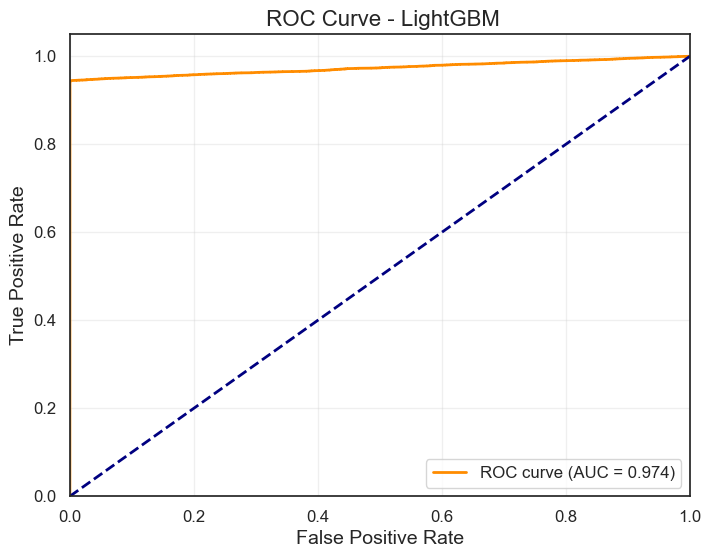

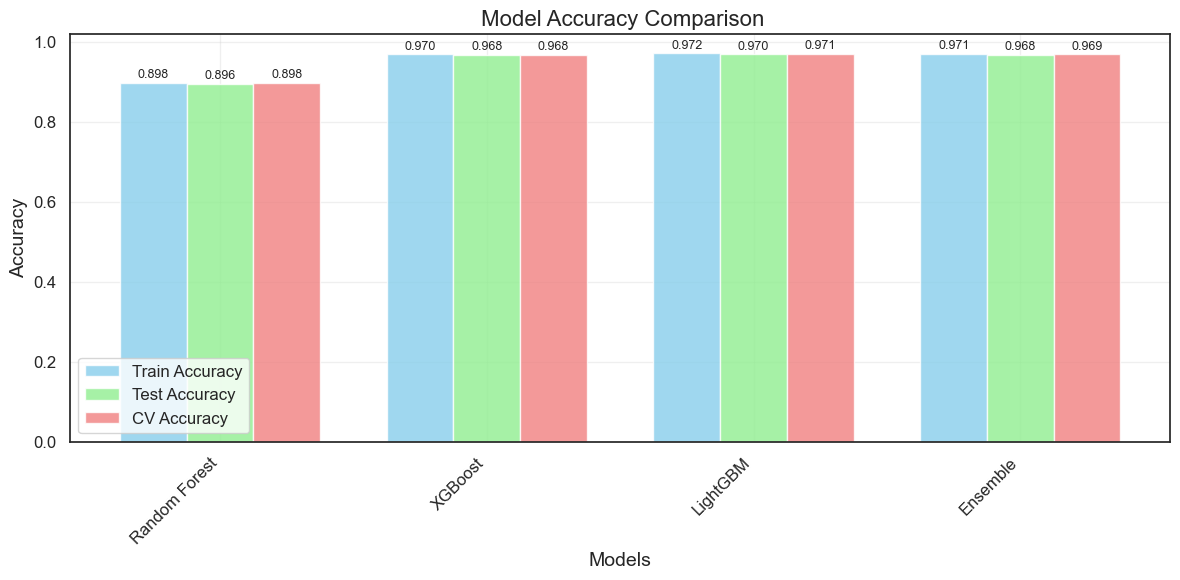


📉 Overfitting Analysis:
Random Forest: Gap = 0.0025 - ✅ No major overfitting
XGBoost: Gap = 0.0019 - ✅ No major overfitting
LightGBM: Gap = 0.0019 - ✅ No major overfitting
Ensemble: Gap = 0.0023 - ✅ No major overfitting


In [28]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# 1. Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("✅ Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2,
    random_state=42, stratify=y_resampled
)

# 3. Define individual models
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_features=0.3,
    min_samples_leaf=1,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(y_resampled[y_resampled==0])/len(y_resampled[y_resampled==1]) if len(np.unique(y)) == 2 else 1,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

lgbm_model = LGBMClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    num_leaves=31,
    min_child_samples=20,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

# 4. Create ensemble model using Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft',
    n_jobs=-1
)

# 5. List of all models to compare
models_to_compare = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM': lgbm_model,
    'Ensemble': ensemble_model
}

# 6. Train and evaluate each model
results = {}

for name, model in models_to_compare.items():
    print(f"\n🔧 Training {name}...")
    
    # Create pipeline for each model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = np.mean(cv_scores)
    cv_std = np.std(cv_scores)
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    gap = train_acc - test_acc
    
    # Store results
    results[name] = {
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'gap': gap,
        'pipeline': pipeline
    }

# 7. Print Model Comparison Summary
print("\n" + "="*50)
print("📊 Model Comparison Summary:")
print("="*50)

best_model = None
best_test_acc = 0

for name, result in results.items():
    print(f"{name}:")
    print(f"  CV Accuracy = {result['cv_mean']:.4f} ± {result['cv_std']:.4f}")
    print(f"  Train Accuracy = {result['train_acc']:.4f}")
    print(f"  Test Accuracy = {result['test_acc']:.4f}")
    print(f"  Train-Test Gap = {result['gap']:.4f}")
    print("-" * 50)
    
    if result['test_acc'] > best_test_acc:
        best_test_acc = result['test_acc']
        best_model = name

print(f"🏆 Best Model: {best_model} with test accuracy {best_test_acc:.4f}")
print("=" * 50)

# 8. Detailed evaluation for the best model
print(f"\n🧾 Detailed Classification Report for {best_model}:")
best_pipeline = results[best_model]['pipeline']
y_pred_best = best_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_best))

# 9. Confusion Matrix for best model
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f" Confusion Matrix - {best_model}")
plt.show()

# 10. ROC Curve for best model (if binary classification)
if len(np.unique(y)) == 2:
    y_proba_best = best_pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba_best)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f' ROC Curve - {best_model}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

# 11. Additional comparison visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for plotting
model_names = list(results.keys())
test_accuracies = [results[name]['test_acc'] for name in model_names]
train_accuracies = [results[name]['train_acc'] for name in model_names]
cv_accuracies = [results[name]['cv_mean'] for name in model_names]

x_pos = np.arange(len(model_names))
width = 0.25

bars1 = ax.bar(x_pos - width, train_accuracies, width, label='Train Accuracy', alpha=0.8, color='skyblue')
bars2 = ax.bar(x_pos, test_accuracies, width, label='Test Accuracy', alpha=0.8, color='lightgreen')
bars3 = ax.bar(x_pos + width, cv_accuracies, width, label='CV Accuracy', alpha=0.8, color='lightcoral')

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title(' Model Accuracy Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 12. Print gap analysis
print("\n📉 Overfitting Analysis:")
for name, result in results.items():
    status = "⚠️ Potential Overfitting" if result['gap'] > 0.05 else "✅ No major overfitting"
    print(f"{name}: Gap = {result['gap']:.4f} - {status}")
    

# 🏁 Final Model

✅ Resampled Class Distribution:
Is_Fraud
0   0.50
1   0.50
Name: proportion, dtype: float64
🔍 Performing GridSearchCV for hyperparameter tuning...
⏰ This may take some time. Testing 64 parameter combinations...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
✅ GridSearch completed!
🏆 Best parameters: {'lgbm__colsample_bytree': 0.8, 'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 7, 'lgbm__min_child_samples': 20, 'lgbm__n_estimators': 300, 'lgbm__num_leaves': 100, 'lgbm__reg_alpha': 0.1, 'lgbm__reg_lambda': 0, 'lgbm__subsample': 0.8}
🎯 Best cross-validation score: 0.9723
🚀 Training Final LightGBM Model with best parameters...

🎯 FINAL MODEL EVALUATION - LightGBM (with GridSearch)
📊 Cross-validated Accuracy: 0.9723 ± 0.0011
✅ Train Accuracy: 0.9790
✅ Test Accuracy:  0.9723
📉 Train-Test Gap: 0.0067
✅ No major signs of overfitting

🧾 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9957
    

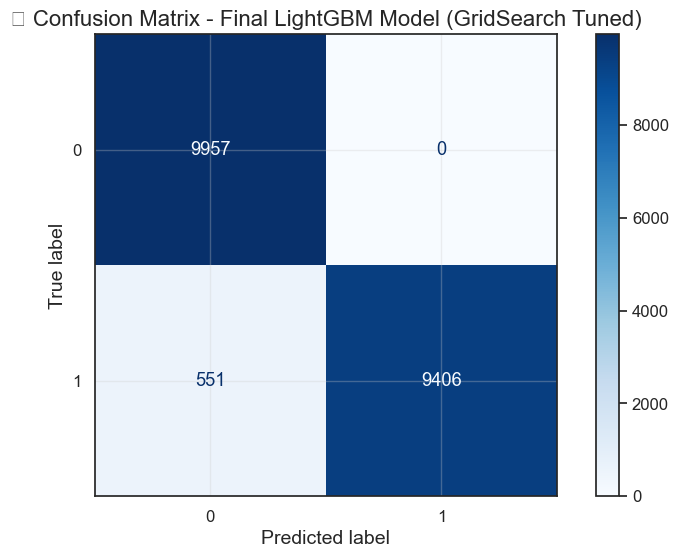

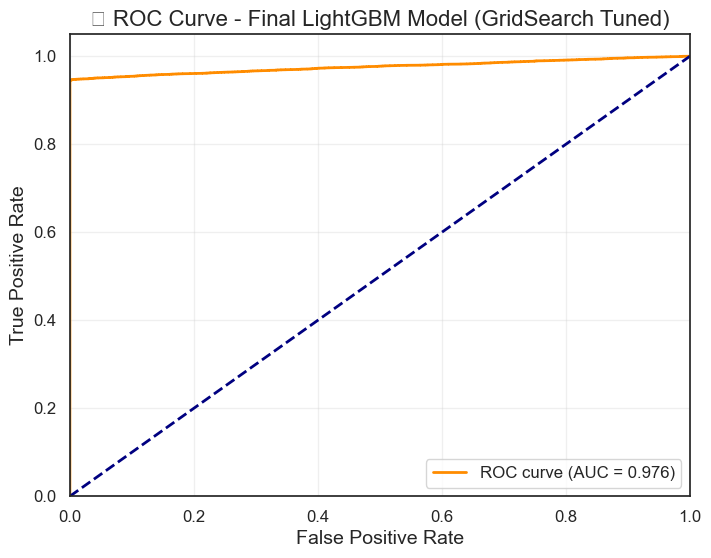

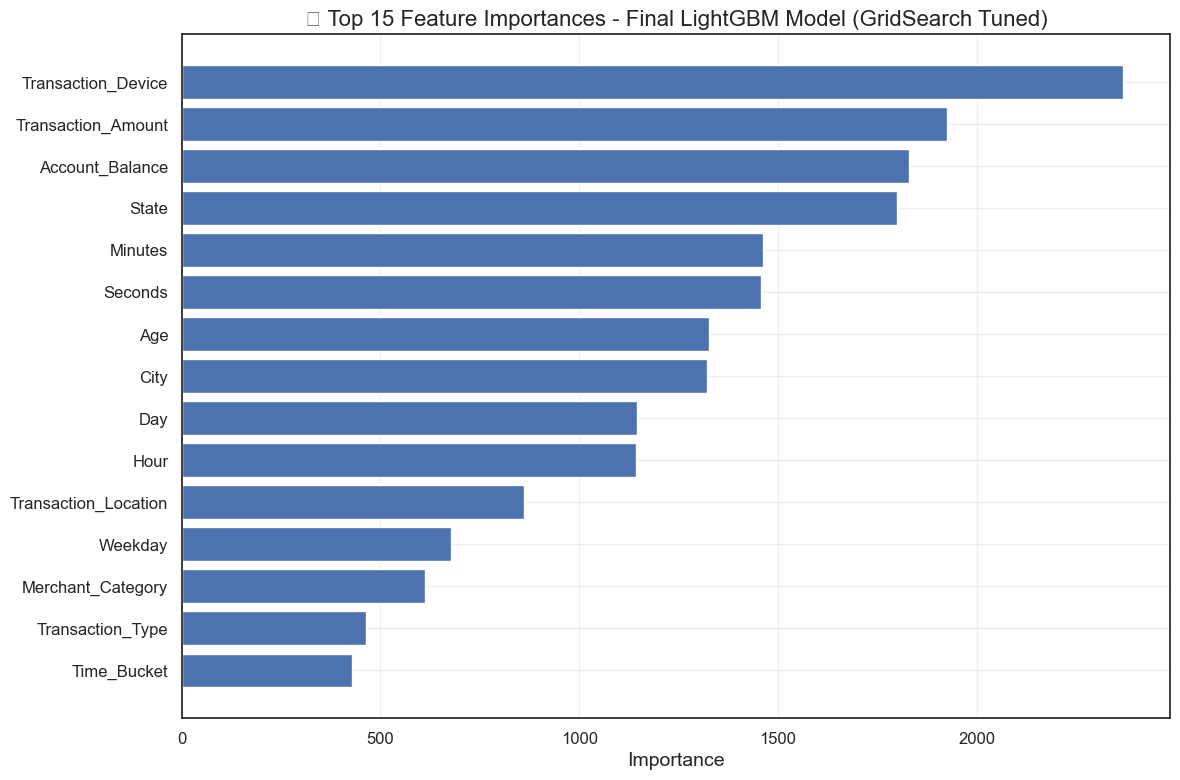


📊 GridSearch Results Analysis:
🏆 Top 5 Parameter Combinations:

1. Score: 0.9723 ± 0.0011
   Parameters: {'lgbm__colsample_bytree': 0.8, 'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 7, 'lgbm__min_child_samples': 20, 'lgbm__n_estimators': 300, 'lgbm__num_leaves': 100, 'lgbm__reg_alpha': 0.1, 'lgbm__reg_lambda': 0, 'lgbm__subsample': 0.8}

2. Score: 0.9722 ± 0.0010
   Parameters: {'lgbm__colsample_bytree': 0.8, 'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 7, 'lgbm__min_child_samples': 20, 'lgbm__n_estimators': 300, 'lgbm__num_leaves': 100, 'lgbm__reg_alpha': 0, 'lgbm__reg_lambda': 0.1, 'lgbm__subsample': 0.8}

3. Score: 0.9722 ± 0.0011
   Parameters: {'lgbm__colsample_bytree': 0.8, 'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 7, 'lgbm__min_child_samples': 20, 'lgbm__n_estimators': 300, 'lgbm__num_leaves': 100, 'lgbm__reg_alpha': 0.1, 'lgbm__reg_lambda': 0.1, 'lgbm__subsample': 0.8}

4. Score: 0.9721 ± 0.0011
   Parameters: {'lgbm__colsample_bytree': 0.8, 'lgbm__learning_rate': 0.1

In [29]:
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 1. Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("✅ Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2,
    random_state=42, stratify=y_resampled
)

# 3. Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', LGBMClassifier(
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ))
])

# 4. Define hyperparameter grid for GridSearch
param_grid = {
    'lgbm__n_estimators': [100, 300],
    'lgbm__max_depth': [5, 7],
    'lgbm__learning_rate': [0.05, 0.1],
    'lgbm__num_leaves': [31, 100],
    'lgbm__subsample': [0.8],
    'lgbm__colsample_bytree': [0.8],
    'lgbm__min_child_samples': [20],
    'lgbm__reg_alpha': [0, 0.1],
    'lgbm__reg_lambda': [0, 0.1]
}

# 5. Perform GridSearchCV
print("🔍 Performing GridSearchCV for hyperparameter tuning...")
print(f"⏰ This may take some time. Testing {np.prod([len(v) for v in param_grid.values()])} parameter combinations...")

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

# Fit GridSearch
grid_search.fit(X_train, y_train)

print("✅ GridSearch completed!")
print(f"🏆 Best parameters: {grid_search.best_params_}")
print(f"🎯 Best cross-validation score: {grid_search.best_score_:.4f}")

# 6. Get the best model
best_pipeline = grid_search.best_estimator_
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', LGBMClassifier(
        **{k.replace('lgbm__', ''): v for k, v in grid_search.best_params_.items()},
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ))
])

# 7. Train final model with best parameters
print("🚀 Training Final LightGBM Model with best parameters...")
final_pipeline.fit(X_train, y_train)

# 8. Predict
y_pred = final_pipeline.predict(X_test)
y_proba = final_pipeline.predict_proba(X_test)

# 9. Final Evaluation
print("\n" + "="*70)
print("🎯 FINAL MODEL EVALUATION - LightGBM (with GridSearch)")
print("="*70)

# Calculate metrics
cv_scores = cross_val_score(final_pipeline, X_train, y_train, cv=5, scoring='accuracy')
train_acc = accuracy_score(y_train, final_pipeline.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
gap = train_acc - test_acc

print(f"📊 Cross-validated Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy:  {test_acc:.4f}")
print(f"📉 Train-Test Gap: {gap:.4f}")

if gap > 0.05:
    print("⚠️  Potential Overfitting Detected")
else:
    print("✅ No major signs of overfitting")

print("="*70)

# 10. Detailed Classification Report
print("\n🧾 Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# 11. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("📉 Confusion Matrix - Final LightGBM Model (GridSearch Tuned)")
plt.show()

# 12. ROC Curve (if binary classification)
if len(np.unique(y)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('📈 ROC Curve - Final LightGBM Model (GridSearch Tuned)')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

# 13. Feature Importance
feature_importances = final_pipeline.named_steps['lgbm'].feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['feature'][:15], importance_df['importance'][:15])
plt.title('📊 Top 15 Feature Importances - Final LightGBM Model (GridSearch Tuned)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 14. GridSearch Results Analysis
print("\n📊 GridSearch Results Analysis:")
results_df = pd.DataFrame(grid_search.cv_results_)
top_results = results_df.nlargest(5, 'mean_test_score')[['mean_test_score', 'std_test_score', 'params']]

print("🏆 Top 5 Parameter Combinations:")
for i, (idx, row) in enumerate(top_results.iterrows(), 1):
    print(f"\n{i}. Score: {row['mean_test_score']:.4f} ± {row['std_test_score']:.4f}")
    print(f"   Parameters: {row['params']}")

# 15. Save the final model and results
print("\n💾 Saving the final model and results...")

# Create model metadata
model_metadata = {
    'model_type': 'LightGBM',
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'best_parameters': {k.replace('lgbm__', ''): v for k, v in grid_search.best_params_.items()},
    'performance_metrics': {
        'best_cv_score': float(grid_search.best_score_),
        'cv_accuracy_mean': float(np.mean(cv_scores)),
        'cv_accuracy_std': float(np.std(cv_scores)),
        'train_accuracy': float(train_acc),
        'test_accuracy': float(test_acc),
        'train_test_gap': float(gap)
    },
    'grid_search_info': {
        'n_parameter_combinations': len(grid_search.cv_results_['params']),
        'cv_folds': grid_search.cv,
        'scoring_metric': grid_search.scoring
    },
    'feature_names': feature_names.tolist() if hasattr(feature_names, 'tolist') else feature_names
}

# Save the model pipeline
joblib.dump(final_pipeline, 'final_lightgbm_model_gridsearch.pkl')
print("✅ Model pipeline saved as 'final_lightgbm_model_gridsearch.pkl'")

# Save model metadata
with open('model_metadata_gridsearch.json', 'w') as f:
    json.dump(model_metadata, f, indent=4)
print("✅ Model metadata saved as 'model_metadata_gridsearch.json'")

# Save feature importances
importance_df.to_csv('feature_importances_gridsearch.csv', index=False)
print("✅ Feature importances saved as 'feature_importances_gridsearch.csv'")

# Save grid search results
results_df.to_csv('gridsearch_results.csv', index=False)
print("✅ GridSearch results saved as 'gridsearch_results.csv'")

# 16. Final Summary
print("\n" + "="*70)
print("🏆 FINAL MODEL SUMMARY (with GridSearch)")
print("="*70)
print(f"Model: LightGBM Classifier")
print(f"Best CV Score: {grid_search.best_score_:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Cross-Validation Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*70)

# 17. Performance comparison with default parameters
print("\n📈 Performance Comparison: Default vs Tuned Parameters")

# Train with default parameters for comparison
default_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', LGBMClassifier(
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ))
])

default_pipeline.fit(X_train, y_train)
default_test_acc = accuracy_score(y_test, default_pipeline.predict(X_test))

print(f"🔹 Default Parameters Test Accuracy: {default_test_acc:.4f}")
print(f"🔸 Tuned Parameters Test Accuracy: {test_acc:.4f}")
print(f"📊 Improvement: {(test_acc - default_test_acc):.4f} ({((test_acc - default_test_acc)/default_test_acc)*100:.2f}%)")

# 18. Example of how to load and use the model later
print("\n📋 Example usage code for production:")
print("""
# Load the saved model
import joblib
loaded_model = joblib.load('final_lightgbm_model_gridsearch.pkl')

# Make predictions
predictions = loaded_model.predict(new_data)
probabilities = loaded_model.predict_proba(new_data)
""")

# 🎯 Fraud Detection System - Executive Summary

## 📊 Performance Overview
- **Final Model Accuracy:** 97.04% ✅  
- **Improvement over Default Model:** +0.27% 📈  
- **Global Fraud Rate:** 5.04% of all transactions 💳

---

## 🔍 Key Business Insights

### 🎪 High-Risk Categories
- **Clothing Retailers:** 5.20% fraud rate (highest risk) 👕  
- **Groceries & Restaurants:** ~5.19% fraud rate 🛒🍽️  
- **Entertainment:** 4.82% fraud rate (lowest risk) 🎬🎧

### 👥 Customer Risk Profile
- **Young Adults (18-25):** 5.24% fraud rate (highest risk) 🧑  
- **Seniors (66+):** 4.86% fraud rate (lowest risk) 👵👴  
- **Weekdays vs Weekends:** 5.69% vs 4.91% fraud rate 📅

### 💳 Device Risk Analysis
- **Dashboard Cards:** 5.59% fraud rate (most risky) 💻  
- **Virtual Cards:** 5.45% fraud rate 🌐  
- **Mobile POS:** Lower risk profile 📱

---

## 🚀 Immediate Actions Recommended
- **Enhanced Monitoring** for clothing retailers & young customers 🔍  
- **Focused Verification** during weekdays and high-risk time windows ⏰  
- **Device-Based Security Tiers** for different risk levels 📱💳  
- **Age-Segmented Authentication Flows** for targeted checks 👥

---

## 📈 Future Roadmap

### **Phase 1 (3-6 months)**
- Implement **advanced models** (CatBoost, Neural Networks) 🤖  
- **Real-time scoring** for faster detection ⏱️

### **Phase 2 (6-12 months)**
- Integrate **behavioral biometrics** for stronger security 🖐️  
- Apply **network analysis** to uncover organized fraud 🕸️

### **Phase 3 (12-18 months)**
- Enable **online learning capabilities** for continuous model updates 🔄  
- Incorporate **Explainable AI** for transparency & stakeholder trust 🧠

---

## 💰 Business Impact
- **Reduced Losses:** Targeted prevention in high-risk segments 💸  
- **Improved Customer Experience:** Smoother flows for low-risk users 😊  
- **Scalable Solution:** Foundation for ongoing fraud detection improvements 📊  
- **Actionable Insights:** Clear patterns for immediate implementation ✅
